# Интернет-магазин «Стримчик». Анализ продаж компьютерных игр

## Ход исследования

Предоставлены данные интернет-магазина **Стримчик** — база данных игр, продаваемых в различных регионах, содержащая информацию о годе выхода игры, платформе, жанре, количестве продаж в каждом регионе и оценке игры как критиками, так и самими игроками. Данные даны за период с 1980 по 2016 год.\
Необходимо провести исследование данных, чтобы выявить наиболее выгодные стратегии рекламной компании, а также определить закономерности продаж в рамках конкретных игровых платформ или жанров.


## Поставленные вопросы и гипотезы:
1. Сколько игр выпускалось в разные годы? 
2. Как менялись продажи в зависимости от платформы? Платформы с наибольшими суммарными продажами и распределение по годам. Характерный срок, в который появляются новые и исчезают старые платформы.
3. Анализ данных за актуальный период. Прогноз на 2017 год. Какие платформы лидируют по продажам, потенциально прибыльные платформы.
4. Диаграмма размаха глобальных продаж игр в разбивке по платформам.
5. Распределение игр по жанрам. Самые прибыльные жанры.
6. Портрет пользователя для каждого региона. Северная Америка, Европа и Япония.

7. Проверка гипотез:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Данные о пользователях я получу из файла\
`games.csv` - список игр, содержащий название игры, год выхода, платформу, жанр, продажи в каждом из трёх регионов (Северная Америка, Япония, Европа) и другие продажи, оценка критиков и игроков, а также возрастной рейтинг ESRB.

О качестве данных ничего не известно, поэтому перед тем, как приступить к анализу, я проведу их предобработку.\
После этого я проверю данные на ошибки и пропуски и оценю их влияние на результаты исследования. Далее, на этапе обработки, я поищу возможность исправить ошибки, которые могут привести к искажению результатов.

Далее я создам новые столбец с указанием общей выручки, после чего проведу исследовательский анализ данных с визуализацией следующих **метрик**:

   1. Количество игр, выпускаемых в разные года;
   2. Продажи по разным платформам;
   3. Продажи за актуальный период;
   4. Размах продаж игр по платформам;
   5. Распределение игр по жанрам.

После этого я составлю портрет пользователя для каждого региона, показав:
   1. Топ-5 популярных платформ региона
   2. Топ-5 популярных жанров региона
   3. Взаимосвязь возврастного рейтинга ESRB и продаж

После составления портретов я проверю анализ этих портретов относительно друг друга.

Далее проверю выдвинутые гипотезы и дам ответы на поставленные вопросы, а в завершении подведу итоги и сделаю выводы.

Таким образом, моё исследование пройдёт в **шесть этапов**:

1. Обзор и предобработка данных
2. Вычисление общей выручки со всех регионов для каждой игры
3. Проведение исследовательского анализа с визуализацией метрик
4. Составление портрета пользователя для каждого региона и анализ портретов
5. Проверка гипотез и ответы на поставленные вопросы
6. Общий вывод по результатам анализа.

# Предобработка данных

## Первичный осмотр датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv', sep=',')
except: 
    df = pd.read_csv('games.csv', sep=',')

In [3]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заметно, что во многих колонках встречаются пропуски, и не все форматы колонок соответствуют нужным.

## Изменение типов данных

Вижу, что в таблице встречаются пропуски, их нужно обработать.\
Но сначала важно сменить форматы данных.\
Привожу названия колонок к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Готово.\
Год релиза, или `year_of_release` - всегда целое число, проверяю это:

In [6]:
print(df['year_of_release'].unique())
print('')
print(df['year_of_release'].isna().sum())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

269


Все числа целые, есть 269 пропусков. Взглянем на эти пропуски:

In [7]:
df[df['year_of_release'].isna()].head()

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN

Заметно, что есть игры, год которых прописан в названии. Нужно перенести его в колонку с годом релиза, это я сделаю далее, и после этого сменю тип на целочисленный.

Возможно, в колонке `critic_score` тоже содержатся только целые числа.\
Проверяю это:

In [8]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В колонке действительно встречаются только целые числа, при этом присутствует много пропусков.

In [9]:
df['critic_score'].isna().sum()

8578

Для изменения типа на целочисленный нужно заполнить пропуски нулём, но это может исказить результаты исследования.\
Оставляю тип float64.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В колонке `user_score`, но тип данных - не численный, а вещественный.\
Проверяю содержимое колонки:

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
df['user_score'].isna().sum()

6701

В колонке числа и много пропусков - **6701**.\
Есть одно строкое значение - 'tbd', смотрю эту строку:

In [13]:
df[df['user_score'] == 'tbd'].head()

name platform  year_of_release  \
119                             Zumba Fitness      Wii           2010.0   
301            Namco Museum: 50th Anniversary      PS2           2005.0   
520                           Zumba Fitness 2      Wii           2011.0   
645                              uDraw Studio      Wii           2010.0   
657  Frogger's Adventures: Temple of the Frog      GBA              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119     Sports      3.45      2.59       0.0         0.66           NaN   
301       Misc      2.08      1.35       0.0         0.54          61.0   
520     Sports      1.51      1.03       0.0         0.27           NaN   
645       Misc      1.65      0.57       0.0         0.20          71.0   
657  Adventure      2.15      0.18       0.0         0.07          73.0   

    user_score rating  
119        tbd      E  
301        tbd   E10+  
520        tbd      T  
645        tbd      E  
657        tbd      E

TBD = To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie

Заполнение нулями таких значений приведёт к искажению результатов.\
При этом эта аббривеатура даёт понять, что при изучении популярности тех игр, которые ещё не оценены геймерами, такие игры не должны влиять на результаты. Поэтому tbd заменяю на пропуски для изменения типа колонки на численный:

In [14]:
df = df.replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float', errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Готово - формат колонки `user_score` изменен на численный. Форматы приведены к нужным.

## Работа с пропусками

### Название игры, или 'name'

В колонке встречается 2 пропуска. Строки с пропусками:

In [15]:
df[df['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

 В этих строках отсутствуют и другие важные данные, количество строк невелико, и я удаляю их из датасета.\
Сначала проверяю процент потерь:

In [16]:
df[df['name'].isna()]['platform'].count()/ \
df['platform'].count()

0.00011965300628178283

Потери совсем незначительны - 0,01%.\
Удаляю строки.

In [17]:
df.dropna(axis = 'index', subset = ['name'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Строки удалены, осталось 16713 строк в датасете.

### Год выхода, или `year_of_release`

Встречается 269 пропусков в колонке `year_of_release`.

In [18]:
df['year_of_release'].isna().sum() / df['year_of_release'].count() * 100

1.6358550231087325

Можно предположить, что есть игры, год выпуска которых прописан в названии игры.\
Для таких игр можно вынести эту дату в колонку `year_of_release`, но год в названии игры не всегда отражает реальный год.\
Процент пропусков невелик - **1.6**, удаляю их из данных.

In [19]:
df.dropna(axis = 'index', subset = ['year_of_release'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Меняю тип колонки на числовой:

In [20]:
df['year_of_release'] = \
df['year_of_release'].astype('int', errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Готово, тип изменён.\
в колонках `user_score` и `critic_score` также встречаются пропуски, однако заполнить их нет возможности:\
Заполнение нулём приведёт к искажению результатов, ведь пропусков больше половины- 50%.\
Высчитывать их на основе остальных нельзя, ведь это независимая от других оценка игры.\
Оставляю, как есть - возможно, некоторые пропуски уйдут во время проверки на дубликаты.

### Рейтинг игры ESRB, или `rating`

Проверяю строки с пропусками в колонке `rating`:

In [21]:
df[df['rating'].isna()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[6676 rows x 11 columns]

Заметно, что часто у игр с пропущенным указанием рейтинга также отсутствует и оценка пользователей, и оценка критиков. Посмотрим, какой процент от общего числа строк составляют строки с пропуском в колонке `rating`:

In [22]:
a = (df[df['rating'].isna()]['name'].count()/ \
df['name'].count() * 100).round(2)
b = (df[(df['rating'].isna()) & (df['critic_score'].isna()) & (df['user_score'].isna())]['name'].count()/ \
df['name'].count() * 100).round(2)
print(f'Какой процент от общего датасета составляют строки с пропуском в колонке rating: {a}')
print(f'Какой процент от общего датасета составляют строки с пропусками одновременно в колонках rating, user_score и critic score: {b}')


Какой процент от общего датасета составляют строки с пропуском в колонке rating: 40.6
Какой процент от общего датасета составляют строки с пропусками одновременно в колонках rating, user_score и critic score: 40.01


Заметно, что строк с пропусками в колонке rating более 40% от общего количества строк, а строк с пропусками в колонках rating, user_score и critic score одновременно - почти 40%. Количество почти одинаково.

Пропущенных значений слишком много, для того чтобы удалять их или заменять нулём - это исказит результаты исследования.\
Пропуски оставляю в изначальном виде, теперь более пристально изучаю уникальные значения в колонке.

In [23]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Ниже приведены актуальные варианты рейтинга **ESRB**:

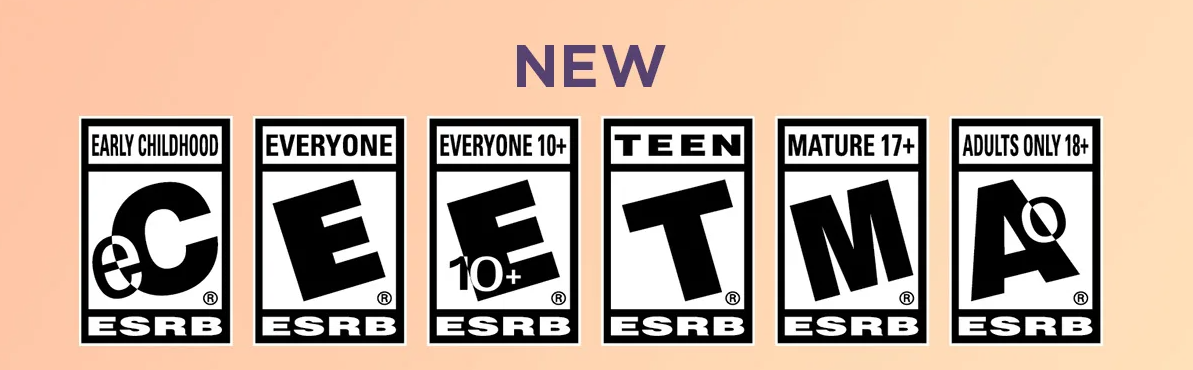

Заметно, что из значений в колонке `rating` актуальной маркировке рейтинга не совпадают значения RP и K-A.\
Провожу ресерч.

Рейтинг **К-А**: игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в **E.** \
https://videogamegeek.com/videogamerating/2220/esrb-k

Заменяю строки с типом рейтинга К-А на Е и проверяю результат:

In [24]:
df['rating'] = df['rating'].replace('K-A','E')
df['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Готово.\
По информации из сети,**«RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.\
Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board
Ошибки тут нет, оставляю в изначальном виде.

При этом количество пропусков очень велико, поэтому установлю на пропуски заглушку **na** - рейтинг не определён.\
Но нужно учитывать, что рейтинг ESRB появился в 1994 году. Смотрю, сколько пропусков рейтинга есть для игр старше 1994 года:

In [25]:
no_rate = df[df['year_of_release'] < 1994]['rating'].isna().sum()
total = df['eu_sales'].count()
print(f'количество игр до 1994 года без указанного рейтинга: {no_rate}')
print(f'пропуски составляют {(no_rate/total*100).round(2)}% от общего количества')

количество игр до 1994 года без указанного рейтинга: 361
пропуски составляют 2.2% от общего количества


Отсутствие рейтинга у игр, выпущенных до 1994 года, понятно. У другого отсутствия может быть иная причина.\
Факт с отсутствием рейтинга до 1994 года можно использовать в дальнейшем. Применяю заглушки.

In [26]:
df['rating'] = df['rating'].fillna('na')
df['rating'].value_counts()

na      6676
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Готово, пропуски устранены.

### Оценка критиков и оценка игроков, или `critic_score` и `user_score` 

Оцениваю количество пропусков в этих столбцах, а также количество строк, где пропущены оба значения:

In [28]:
all = df['name'].count()
critic_null = df[df['critic_score'].isna()]['name'].count()
users_null = df[df['user_score'].isna()]['name'].count()
total_null = df[(df['critic_score'].isna()) & (df['user_score'].isna())]['name'].count()
print(f'Количество пропусков в колонке critic_score: {critic_null}')
print(f'Процент пропусков critic_score: {(critic_null / all * 100).round(2)}')
print(f'Количество пропусков в колонке user_score: {users_null}')
print(f'Процент пропусков users_score: {(users_null / all * 100).round(2)}')
print(f'Количество строк с пропуском в обоих колонках: {total_null}')
print(f'Процент строк с пропуском в обоих колонках: {(total_null / all * 100).round(2)}')


Количество пропусков в колонке critic_score: 8461
Процент пропусков critic_score: 51.45
Количество пропусков в колонке user_score: 8981
Процент пропусков users_score: 54.62
Количество строк с пропуском в обоих колонках: 7892
Процент строк с пропуском в обоих колонках: 47.99


Налицо большое количество пропусков - их нельзя ни заменить, ни заполнить нулем, чтобы не искажать результаты.\
Также заметно, что в большинстве случаев отсутствует и пользовательский рейтинг, и рейтинг критиков одновременно.\
Строки с пропусками в обоих колонках составляют выше 47% от изначального датасета.

Финально проверяю информацию о данных:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски удалены, где это возможно, некорректные названия категорий рейтинга скорректированы на верные, названия колонок приведены к нижнему регистру, выявлены столбцы с наибольшим количеством пропусков одновременно - `critic_score`, `user_score`, `rating`, иначе говоря - оценки игры и ее рейтинг. Количество строк с пропусками в обоих колонках составляет более 47% от всех данных.

## Поиск и устранение дубликатов

Привожу все строковые значения к нижнему регистру, чтобы выявить дубликаты:

In [30]:
s = ['name', 'platform', 'genre', 'rating']
for i in s:
    df[i] = df[i].str.lower()

Проверяю, что значения строчные:

In [31]:
df[['name', 'platform', 'genre', 'rating']].head(10)

name platform         genre rating
0                 wii sports      wii        sports      e
1          super mario bros.      nes      platform     na
2             mario kart wii      wii        racing      e
3          wii sports resort      wii        sports      e
4   pokemon red/pokemon blue       gb  role-playing     na
5                     tetris       gb        puzzle     na
6      new super mario bros.       ds      platform      e
7                   wii play      wii          misc      e
8  new super mario bros. wii      wii      platform      e
9                  duck hunt      nes       shooter     na

Готово, все строчные значения приведены к нижнему регистру.\
Провожу проверку на явные дубликаты:

In [32]:
df.duplicated().sum()

0

Явных дубликатов не найдено.\
Теперь проверю данные на неявные дубликаты - они могут быть в строках, где совпадает название игры, год и платформа.

In [33]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    madden nfl 13      ps3             2012  sports      2.11      0.22   
16230  madden nfl 13      ps3             2012  sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
604         0.0         0.23          83.0         5.5      e  
16230       0.0         0.00          83.0         5.5      e

Найден 1 неявный дубликат - игра madden nfl 13.\
Удаляю эту строку и проверяю количество оставшихся строк:

In [34]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Готово, теперь строк осталось 16712, на одну меньше, чем было.

Ищу дубликаты в колонке 'name':

In [35]:
df['name'].duplicated().sum()

5017

In [36]:
df['name'].value_counts()

need for speed: most wanted       12
fifa 14                            9
ratatouille                        9
lego marvel super heroes           9
fifa soccer 13                     8
                                  ..
army corps of hell                 1
naruto shippuden: kizuna drive     1
all-star baseball 2000             1
demigod                            1
a boy and his blob                 1
Name: name, Length: 11426, dtype: int64

В колонке встречаются дубли, например, need for speed: most wanted.\
Просматриваю строки с такими дублями:

In [37]:
df[df['name'] == 'need for speed: most wanted']

name platform  year_of_release   genre  \
253    need for speed: most wanted      ps2             2005  racing   
523    need for speed: most wanted      ps3             2012  racing   
1190   need for speed: most wanted     x360             2012  racing   
1591   need for speed: most wanted     x360             2005  racing   
1998   need for speed: most wanted       xb             2005  racing   
2048   need for speed: most wanted      psv             2012  racing   
3581   need for speed: most wanted       gc             2005  racing   
5972   need for speed: most wanted       pc             2005  racing   
6273   need for speed: most wanted     wiiu             2013  racing   
6410   need for speed: most wanted       ds             2005  racing   
6473   need for speed: most wanted      gba             2005  racing   
11715  need for speed: most wanted       pc             2012  racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
253        2.03      1.79      0.08         0.47          82.0         9.1   
523        0.71      1.46      0.06         0.58           NaN         NaN   
1190       0.62      0.78      0.01         0.15          83.0         8.5   
1591       1.00      0.13      0.02         0.10          83.0         8.5   
1998       0.53      0.46      0.00         0.05          83.0         8.8   
2048       0.33      0.45      0.01         0.22           NaN         NaN   
3581       0.43      0.11      0.00         0.02          80.0         9.1   
5972       0.02      0.23      0.00         0.04          82.0         8.5   
6273       0.13      0.12      0.00         0.02           NaN         NaN   
6410       0.24      0.01      0.00         0.02          45.0         6.1   
6473       0.19      0.07      0.00         0.00           NaN         8.3   
11715      0.00      0.06      0.00         0.02          82.0         8.5   

      rating  
253        t  
523       na  
1190       t  
1591       t  
1998       t  
2048      na  
3581       t  
5972       t  
6273      na  
6410       e  
6473       e  
11715      t

Значит, дублируется только название игры, но каждая строка содержит разные игровые платформы.\
Такие дубли удалять не нужно.

Проверяю уникальные значения колонки platform:

In [38]:
df['platform'].value_counts()

ps2     2127
ds      2121
ps3     1305
wii     1286
x360    1232
psp     1193
ps      1190
pc       957
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
snes     239
sat      173
wiiu     147
2600     116
nes       98
gb        97
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

Неявных дублей также не обнаружено.

Дубликатов в датасете не встречается.

# Расчет суммарной прибыли во всех регионах

In [39]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii             2006        sports     41.36   
1         super mario bros.      nes             1985      platform     29.08   
2            mario kart wii      wii             2008        racing     15.68   
3         wii sports resort      wii             2009        sports     15.61   
4  pokemon red/pokemon blue       gb             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      e  
1      3.58      6.81         0.77           NaN         NaN     na  
2     12.76      3.79         3.29          82.0         8.3      e  
3     10.93      3.28         2.95          80.0         8.0      e  
4      8.89     10.22         1.00           NaN         NaN     na

Добавляю колоку `all_sales`, или общие продажи, которая суммирует значения колонок `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, отражающих продажи для каждого из регионов.

In [40]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii             2006        sports     41.36   
1         super mario bros.      nes             1985      platform     29.08   
2            mario kart wii      wii             2008        racing     15.68   
3         wii sports resort      wii             2009        sports     15.61   
4  pokemon red/pokemon blue       gb             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  all_sales  
0     28.96      3.77         8.45          76.0         8.0      e      82.54  
1      3.58      6.81         0.77           NaN         NaN     na      40.24  
2     12.76      3.79         3.29          82.0         8.3      e      35.52  
3     10.93      3.28         2.95          80.0         8.0      e      32.77  
4      8.89     10.22         1.00           NaN         NaN     na      31.38

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Выручка посчитана в новой колонке, пропущенных значений нет.

Теперь финально проверяю данные:

In [42]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

**Выводы по проведенному анализу и предобработке данных:**

В исходном датасете встречаются пропуски.\
2 пропуска в колонке name(название игры), 2 пропуска в колонке genre(жанр), около 200 пропусков в колонке year_of_release(дата выхода).

Очень большое количество пропусков встречается в столбцах рейтинга: critic_score(рейтинг критиков), user_score(рейтинг игроков) и rating (возрастной рейтинг ESRB). Количество строк с пропусками одновременно в этих трёх столбцах достигает 40% от всех изначальных данных.\
Возможно, есть причина, по которой эти данные отсутствуют, которая не является технической ошибкой. Это будет изучено далее.\
Сейчас пропуски заменены на na - нет рейтинга.
Пропуски в колонках name, year_of_release и genre можно объяснить работой системы - то есть технические ошибки при выгрузке. На это указывает также то, что пропусков очень мало.\
В остальных колонках пропусков нет.

Также в исходном датасете не все типы данных соответствуют реальным - year_of_release является целым числом, а не дробным, но тип указан float.\
Кроме этого, колонка user_score содержит числа, но тип колонки - object, а не int.\
Эти типы данных приведены к нужным, причина некорректных типов - технические настройки при выгрузке датасета.


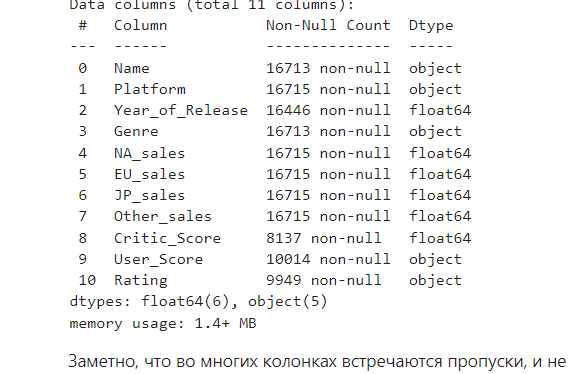


# Исследовательский анализ

## Количество игр, выпускаемых в разные года

In [43]:
df.head(5)

name platform  year_of_release         genre  na_sales  \
0                wii sports      wii             2006        sports     41.36   
1         super mario bros.      nes             1985      platform     29.08   
2            mario kart wii      wii             2008        racing     15.68   
3         wii sports resort      wii             2009        sports     15.61   
4  pokemon red/pokemon blue       gb             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  all_sales  
0     28.96      3.77         8.45          76.0         8.0      e      82.54  
1      3.58      6.81         0.77           NaN         NaN     na      40.24  
2     12.76      3.79         3.29          82.0         8.3      e      35.52  
3     10.93      3.28         2.95          80.0         8.0      e      32.77  
4      8.89     10.22         1.00           NaN         NaN     na      31.38

В выборке - информация об играх, выпущенных с 1980 по 2016 год.\
Для того, чтобы увидеть, как меняется количество выпущенных игр год от года cвожу таблицу, подсчитывая количество игр, выпущенное в каждый год.

In [44]:
years = df.groupby('year_of_release').agg({'name':'count'}).reset_index().astype('int')
years.columns = ['год выхода игры', 'количество игр']
years.set_index('год выхода игры')

количество игр
год выхода игры                
1980                          9
1981                         46
1982                         36
1983                         17
1984                         14
1985                         14
1986                         21
1987                         16
1988                         15
1989                         17
1990                         16
1991                         41
1992                         43
1993                         60
1994                        121
1995                        219
1996                        263
1997                        289
1998                        379
1999                        338
2000                        350
2001                        482
2002                        829
2003                        775
2004                        762
2005                        939
2006                       1006
2007                       1197
2008                       1427
2009                       1426
2010                       1255
2011                       1136
2012                        652
2013                        544
2014                        581
2015                        606
2016                        502

Из таблицы видно, что до 1992 года выпускалось менее 50 игр в год, а более 100 игр в год было впервые выпущено в 1994 году.\
Для анализа подойдут не все данные, а их часть.\
Нужно понять, когда выпуск игр стал по-настоящему массовым явлением, чтобы использовать это как нижнюю границу выборки. Очевидно, что это год в районе 2000-х.\
Строю график, чтобы увидеть самый резкий рост в количестве между двумя соседними годами в период с 1994 по 2010 год:

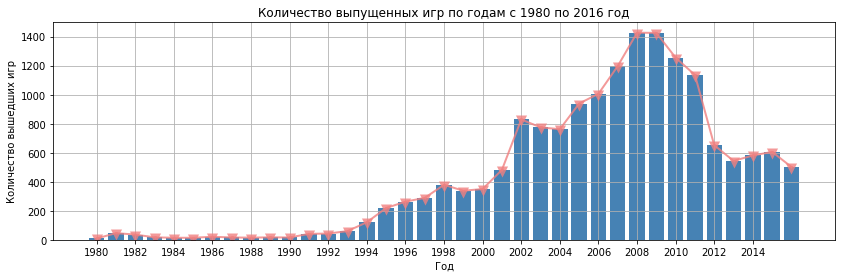

In [45]:
plt.figure(figsize=(14,4))
plt.xticks(np.arange(1980, 2016, 2))
plt.title('Количество выпущенных игр по годам с 1980 по 2016 год')
plt.xlabel('Год')
plt.ylabel('Количество вышедших игр')
plt.grid()
plt.bar(years['год выхода игры'], years['количество игр'], color='steelblue')
plt.plot(years['год выхода игры'], years['количество игр'], 'lightcoral',
         alpha=0.8, label="first", lw=2, mec='lightcoral', mew=5, ms=3, marker='v');

Отчётливо видно, что самый резкий скачок количества выпущенных игр **был в 2002 году, в сравнении с 2001 годом.**

In [46]:
years[(years['год выхода игры'] >= 2001) & (years['год выхода игры'] < 2003)].set_index('год выхода игры')

количество игр
год выхода игры                
2001                        482
2002                        829

Количество новых игр выросло почти в **2 раза**. 

Строю график для новой выборки:

**Вывод:** массовое появление новых игр впервые началось в **2002 году** и превысило 800 выпущенных игр.\
Ранее, до 1993 года, было не более 50 релизов в год, а до 2001 - не более 400 релизов.\
После этого общее количество выпущенных игр почти не менялось **с 2002 по 2004 год** (незначительно уменьшаясь).\
С **2005 по 2008 год** происходит интенсивный **рост** количества выпущенных игр в геометрической прогресии (все больше с каждым годом), **превышая** 1400 выпусков в год.\
В 2009 году количество выпущенных игр было таким же, как и в 2008.\
Далее **с 2009 по 2011 год** количество выходов новых игр **снижается** примерно на 100 игр каждый год, а **в 2012 году** - резкое **падение** количества новых релизов примерно на 500, до 653 выпущенных игр.\
После **2012 года** количество новых релизов почти не менялось, незначительно уменьшаясь в **2013 году** и незначительно увеличиваясь к **2014-2015 г.**\
2016 год ещё не закончился, поэтому сложно судить про эту метрику.


## Продажи по разным платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Свожу данные по названию платформ, и суммируя выручку с каждой, чтобы выявить 10 платформ с самыми высокими продажами:

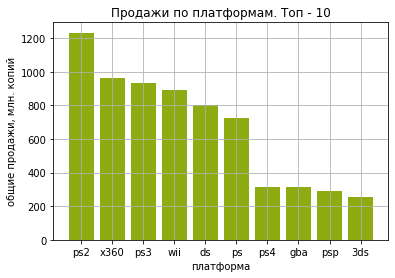

In [47]:
top10 = df.groupby('platform').agg({'all_sales':'sum'}).sort_values('all_sales', ascending=False).head(10).reset_index()
top10.columns=['платформа','общие продажи, млн. копий']
top10.set_index('платформа')
plt.title('Продажи по платформам. Топ - 10')
plt.xlabel('платформа')
plt.ylabel('общие продажи, млн. копий')
plt.grid()
plt.bar(top10['платформа'], top10['общие продажи, млн. копий'], color='#8eab12');

Заметно больше, чем остальные платформы, принесли продажи игр на ps2, на последнем месте рейтинга - 3ds.

Теперь построю график, на котором отображены суммарные продажи 10ти самых крупных платформ за каждый год.\
Важно посмотреть на период, когда на рынке появилось уже несколько платформ.\
Сначала смотрю, в каком году и на какой платформе впервые выходили игры:

In [48]:
df[df['platform'].isin(top10['платформа'])].sort_values('year_of_release').head()

name platform  year_of_release  \
15957  strongest tokyo university shogi ds       ds             1985   
12111        motor toon grand prix (japan)       ps             1994   
5083            kileak: the dna imperative       ps             1994   
2618                                  doom       ps             1994   
3489                            theme park       ps             1994   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
15957      action      0.00      0.00      0.02         0.00           NaN   
12111      racing      0.00      0.00      0.06         0.00           NaN   
5083      shooter      0.08      0.06      0.21         0.02           NaN   
2618      shooter      0.43      0.30      0.00         0.05           NaN   
3489   simulation      0.24      0.16      0.13         0.04           NaN   

       user_score rating  all_sales  
15957         NaN     na       0.02  
12111         NaN     na       0.06  
5083          NaN     na       0.37  
2618          NaN     na       0.78  
3489          NaN     na       0.57

In [49]:
df[(df['platform'] == 'ds') & (df['year_of_release'] < 2004)]

name platform  year_of_release   genre  \
15957  strongest tokyo university shogi ds       ds             1985  action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0           NaN         NaN   

      rating  all_sales  
15957     na       0.02

Заметно, что в информации о релизах на DS есть одна запись с очень малой датой. Nintendo DS был выпущен в 2004 году. Если проверить записи до 2004 года, то она всего одна. При этом запись не является аномалией - такая игра действительно выпускалась на японском рынке.

Из таблицы видно, что первые крупные продажи компьютерных игр начались в 1992 году, а первые игры на других платформах помимо PC появились только в 1994 году, это был playStation.

Для наглядности строю график, начиная **с 1992 года**:

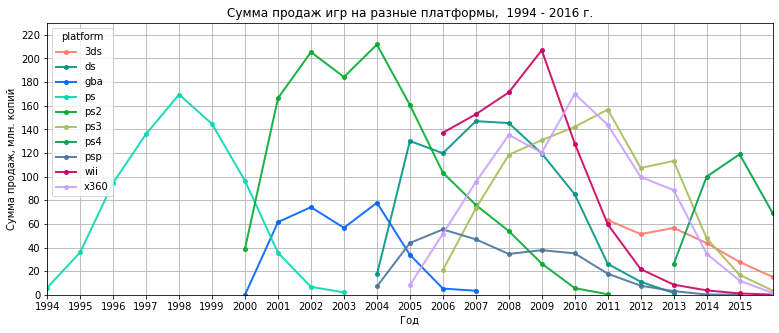

In [50]:
top = df.groupby(['platform','year_of_release']).agg({'all_sales':'sum'}).reset_index()
top = top[top['platform'].isin(top10['платформа'])]
top.pivot(index='year_of_release',
          columns='platform', values='all_sales') \
.query('year_of_release >= 1994').plot(grid=True, figsize=(13, 5),
                                      lw=2, marker='o', ms=4, alpha=0.9, 
                                      color=['#ff796c','#029386','#0165fc',
                                             '#04d8b2','#02ab2e','#a4be5c',
                                             '#01a049', '#49759c','#cb0162','#caa0ff'])

plt.xlim([1994., 2016])
plt.ylim([0., 230])
plt.yticks(range(0, 230, 20))
plt.xticks(range(1994, 2016, 1));

plt.title('Сумма продаж игр на разные платформы,  1994 - 2016 г.')
plt.xlabel('Год')
plt.ylabel('Сумма продаж, млн. копий');

На графике хорошо видно, как новые платформы появлялись, достигали максимальной популярности, а после этого с течением лет ее теряли ввиду выхода новых платформ и устаревания старых, ведь системные требования игр все это время росли.\
Также заметно, что после 2010 года общие продажи по всем платформам пошли на спад, единственное исключение - появившаяся в 2013 году PS4.
 
**За какой характерный срок появляются новые и исчезают старые платформы?**

На примере PlayStation:\
**PS1** - 4 года подъёма продаж и 5 лет спада, после чего продажи прекращаются. 1994 - 2003 г.\
**PS2** - 4 года подъёма продаж (с небольшим проседанием на 3й год) и 5 лет спада, после чего уровень продаж падает ниже изначального, и продажи прекращаются через 2 года. Продажи не падали ниже изначальных с 2000 - 2009 г.\
**PS3** - 5 лет подъёма продаж и 5 лет спада. Продажи не падали ниже изначальных с 2006 - 2015 г.\
**PS4** - 2 года роста и 1 год спада, который может быть связан с общим падением продаж в секторе игр.

На примере иных платформ:\
**GBA** - 4 года роста с просадкой на 3 год и 3 года спада. После продаж не было. 2000 - 2007 г.\
**Wii** - 3 года роста и 6 лет спада, причем на 1й год спада продажи упали ниже изначальных. 2006 - 2015 г.\
**psp** - 2 года роста и 7 лет спада, 2006 - 2015 г.\
**x360** - 5 лет роста с просадкой на 4 год и 5 лет спада. 2005 - 2015 г.

Тем не менее, считаю средний срок жизни платформы.

In [51]:
life = df.copy()
life = life.pivot_table(index='platform', values = 'year_of_release', aggfunc=['min', 'max']).reset_index()
life['temp'] = life['max'] - life['min'] + 1
life['temp'].median()

7.0

**Вывод**: Игровые платформы в среднем имеют характерный срок рассвета своей популярности и падения продаж после его окончания.\
Этот срок составляет 3-4 года.\
При этом платформа исчезает с рынка в среднем через 7 лет после появления.

In [52]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

## Анализ за актуальный период

Для того, чтобы представить тенденции и прогноз на 2017 год, нужен актуальный период - беру продажи с 2014 по 2016 год.

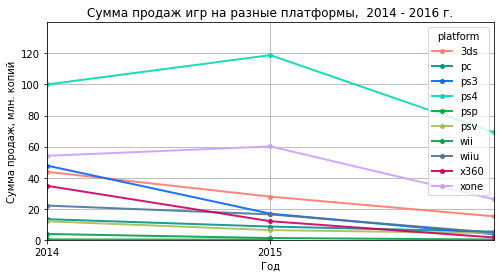

In [53]:
actual = df.groupby(['platform','year_of_release']).agg({'all_sales':'sum'}).query('year_of_release >= 2014').reset_index()
actual.pivot(index='year_of_release',
          columns='platform', values='all_sales') \
.query('year_of_release >= 1992').plot(grid=True, figsize=(8, 4),
                                      lw=2, marker='o', ms=4, alpha=0.9, 
                                      color=['#ff796c','#029386','#0165fc',
                                             '#04d8b2','#02ab2e','#a4be5c',
                                             '#01a049', '#49759c','#cb0162','#caa0ff'])

plt.xlim([2014., 2016])
plt.ylim([0., 140])
plt.yticks(range(0, 140, 20))
plt.xticks(range(2014, 2016));

plt.title('Сумма продаж игр на разные платформы,  2014 - 2016 г.')
plt.xlabel('Год')
plt.ylabel('Сумма продаж, млн. копий');

Из графика видно, что продажи по всем платформам падали в течение 2015-2016 года.\
При этом с 2014 по 2015 год продажи росли **только у платформ PS4 и Xbox One**.\
Смотрю, какие платформы принесли в **2016** году прибыли больше остальных:

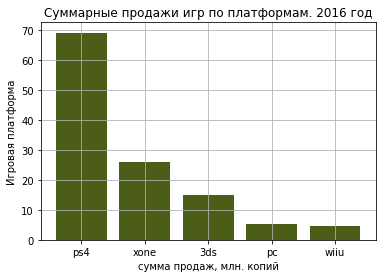

In [54]:
year2016 = actual[actual['year_of_release'] == 2016].sort_values('all_sales',
                                                      ascending=False).reset_index(drop=True).head()

plt.title(f'Суммарные продажи игр по платформам. 2016 год')
plt.xlabel('сумма продаж, млн. копий')
plt.ylabel('Игровая платформа');
plt.grid()
plt.bar(year2016['platform'], year2016['all_sales'], color='#4b5d16');

В качестве перспективных по продажам платформ можно выделить первые три - **ps4, xone и 3ds**.\
Посмотрим, сколько продаж приносили эти платформы годом ранее:

In [55]:
yrs = actual[(actual['platform'] == 'ps4') |
      (actual['platform'] == 'xone') | 
      (actual['platform'] == '3ds')
      ].pivot(columns='year_of_release', 
              index='platform', values='all_sales')

yrs

year_of_release    2014    2015   2016
platform                              
3ds               43.76   27.78  15.14
ps4              100.00  118.90  69.25
xone              54.07   60.14  26.15

Заметно, что продажи игр на 3ds и в 2015 были небольшими, особо не изменившись в то время как у ps4 и xone они были больше текущих в 2-3 раза, и занимали одни из самых высокий позиций топа.\
При этом ps4 согласно общему графику, скорее всего, будет набирать обороты далее, ведь консоль вышла недавно, и средние сроки актуальности для неё ещё не прошли.

**Вывод:** Потенциально прибыльные платформы на 2017 год - **PlayStation 4** и **Xbox One**.


## Диаграмма размаха продаж игр по самым крупным игровым платформам

Создаю отдельный датасет за актуальный период:

In [56]:
actual = df[df['year_of_release'] >= 2014]

Строю график по продажам платформ за актуальный период:

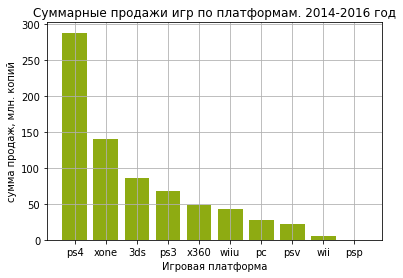

In [57]:
top_actual = actual.groupby('platform').agg({'all_sales':'sum'}).sort_values('all_sales', ascending=False).reset_index()

plt.title(f'Суммарные продажи игр по платформам. 2014-2016 год')
plt.xlabel('Игровая платформа')
plt.ylabel('сумма продаж, млн. копий');
top_actual.columns=['платформа','общие продажи, млн. копий']
top_actual.set_index('платформа')
plt.grid()
plt.bar(top_actual['платформа'], top_actual['общие продажи, млн. копий'], color='#8eab12');


Выделяю из главной таблицы только интересующие платформы и строю диаграмму размаха:

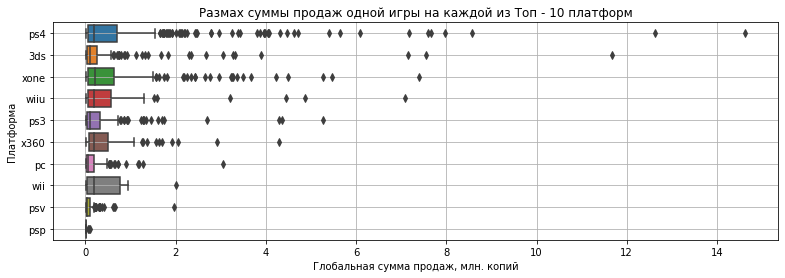

In [58]:
import seaborn as sns

plt.figure(figsize=(13, 4))
sns.boxplot(x='all_sales', y='platform', data=actual);

plt.grid(True);
plt.title('Размах суммы продаж одной игры на каждой из Топ - 10 платформ')
plt.xlabel('Глобальная сумма продаж, млн. копий')
plt.ylabel('Платформа');

Заметно большое число выбросов. Это не значит, что значения неверные - разные игры могут приносить разную прибыль, некоторые - гораздо больше других.\
Например, взглянем на самый выбивающийся выброс - игра на ps4, общие продажи по которой превысили 14 млн. копий:

In [59]:
actual[actual['all_sales'] > 14]

name platform  year_of_release    genre  na_sales  \
31  call of duty: black ops 3      ps4             2015  shooter      6.03   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
31      5.86      0.36         2.38           NaN         NaN     na   

    all_sales  
31      14.63

Также нужно вглянуть на масштабированный вариант, чтобы ближе рассмотреть боксплоты:

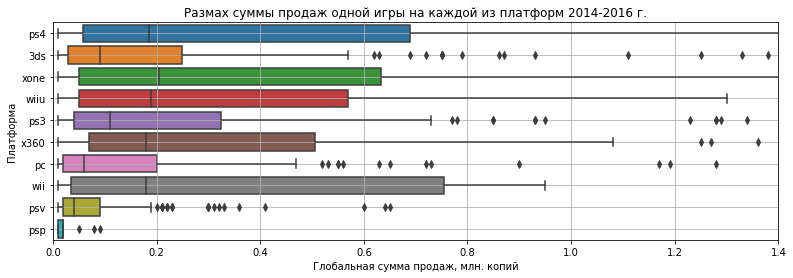

In [60]:
plt.figure(figsize=(13, 4))
sns.boxplot(x='all_sales', y='platform', data=actual);

plt.grid(True);
plt.xlim(0,1.4)
plt.title('Размах суммы продаж одной игры на каждой из платформ 2014-2016 г.')
plt.xlabel('Глобальная сумма продаж, млн. копий')
plt.ylabel('Платформа');

Кроме диаграммы размаха вывожу таблицу со средними и медианными значениями в порядке убывания:

In [61]:
actual.groupby('platform')['all_sales'].describe().round(3).sort_values('50%', ascending=False)

count   mean    std   min    25%    50%    75%    max
platform                                                       
xone      228.0  0.616  1.047  0.01  0.050  0.205  0.633   7.39
wiiu       73.0  0.589  1.161  0.01  0.050  0.190  0.570   7.09
ps4       376.0  0.766  1.615  0.01  0.057  0.185  0.690  14.63
wii        11.0  0.461  0.625  0.01  0.035  0.180  0.755   2.01
x360      111.0  0.434  0.629  0.01  0.070  0.180  0.505   4.28
ps3       219.0  0.311  0.633  0.01  0.040  0.110  0.325   5.27
3ds       212.0  0.409  1.188  0.01  0.030  0.090  0.250  11.68
pc        151.0  0.179  0.329  0.01  0.020  0.060  0.200   3.05
psv       295.0  0.076  0.142  0.01  0.020  0.040  0.090   1.96
psp        13.0  0.028  0.028  0.01  0.010  0.020  0.020   0.09

**Вывод:** самый большой размах - у игр для Xbox One, самый маленький - у игр для psp.
Также значительно велик размах у продаж игр для Wii U.

При этом заметно, что медианное значение суммы продаж одной игры на любой платформе не превышает 0.22, или 220 000 копий.\
Лидер по медианному значению - Wii U (215 000 продаж), самое низкое медианное значение - у psp, 20 000 проданных копий.
Самое большое среднее значение продаж одной игры у платформы **ps4** = 625 000 продаж.\
Рядом находится **Xbox One** со средним в 517 000 продаж и **Wii U** с 499 000 продаж одной игры в среднем.

При проведении рекламной компании стоит учитывать, что лучше всего продаются игры на PS4, Xbox One и Wii U.

## Как отзывы пользователей и критиков влияют на продажи внутри одной платформы

Смотрю, записей по какой платформе имеется больше всего:

In [62]:
actual['platform'].value_counts()

ps4     376
psv     295
xone    228
ps3     219
3ds     212
pc      151
x360    111
wiiu     73
psp      13
wii      11
Name: platform, dtype: int64

Для анализа использую 5 самых часто встречающихся платформ: ps4, psv, xone, 3ds, ps3.

Создаю функцию, которая построит диаграммы рассеяния по названию платформы. Она покажет, есть ли взаимосвязь с отзывами критиков и игроков

In [63]:
def rate(platform):
    rev_df = actual[actual['platform'] == platform]
    rev_corr = rev_df['user_score'].corr(rev_df['all_sales'])
    
    rev_df.sort_values('all_sales').plot(x='user_score', y='all_sales',
                                                           kind='scatter', alpha=0.15,
                                                           grid=True, color='#1fa774')
    plt.title(f'Зависимость общих продаж игры от отзывов игроков. {platform}')
    plt.xlabel('Рейтинг игроков')
    plt.ylabel('Общие продажи игры, млн. копий');
    print(f'уровень корреляции продаж с отзывами игроков: {rev_corr}')
    m = (rev_df['user_score'].mean()*10)
    print(f'Средняя оценка игроков: {m}')
    
    
    rev_df = actual[actual['platform'] == platform]
    rev_corr = rev_df['critic_score'].corr(rev_df['all_sales'])
    
    rev_df.sort_values('all_sales').plot(x='critic_score', y='all_sales',
                                                           kind='scatter', alpha=0.15,
                                                           grid=True, color='#b790d4')
    plt.title(f'Зависимость общих продаж игры от отзывов критиков. {platform}')
    plt.xlabel('Рейтинг критиков')
    plt.ylabel('Общие продажи игры, млн. копий');
    print(f'уровень корреляции продаж с отзывами критиков: {rev_corr}')
    m = rev_df['critic_score'].mean()
    print(f'Средняя оценка критиков: {m}')

уровень корреляции продаж с отзывами игроков: -0.040131589472697356
Средняя оценка игроков: 68.2809917355372
уровень корреляции продаж с отзывами критиков: 0.40266141068104083
Средняя оценка критиков: 72.16455696202532


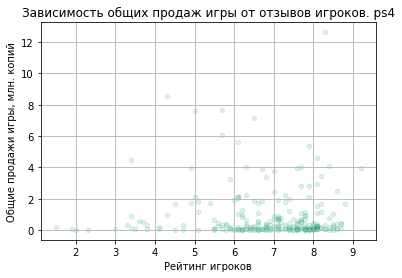

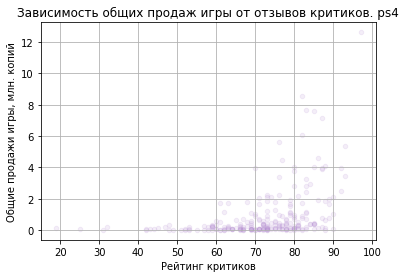

In [64]:
rate('ps4')

**PS4**

Заметна незначительная отрицательная корреляция продаж с **оценками игроков** - **-0.06**.\
Это означает, что отзывы игроков практически не влияют на продажи.\
При этом средняя оценка пользователями - **68.5**.

Также видно корреляцию продаж с **оценками критиков** - **0.39**.\
Это небольшое значение, но наглядно видно, что продажи игры коррелируют с отзывами критиков в несколько раз больше, чем с отзывами игроков.\
При этом средняя оценка критиками - **71.9**.

В среднем критики ставят более высокие оценки, чем пользователи.

Смотрю на другие платформы:

уровень корреляции продаж с отзывами игроков: -0.0703839280647581
Средняя оценка игроков: 65.94545454545454
уровень корреляции продаж с отзывами критиков: 0.42867694370333226
Средняя оценка критиков: 73.79354838709678


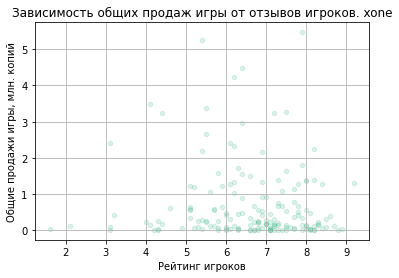

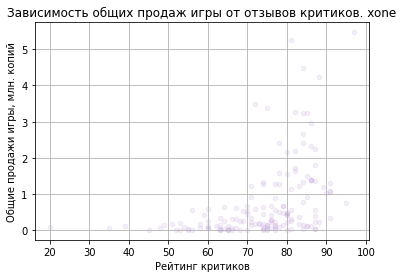

In [65]:
rate('xone')

**Xbox One**\
Корреляция с отзывами игроков **невелика: - 0.04**, корреляция с отзывами критиков - **0.43**.\
Средняя оценка игроков - **65.4**, а средняя оценка критиков - **73.6**.

Эти показатели очень близки с показателям для PS4. Проверяю дальше:


уровень корреляции продаж с отзывами игроков: -0.16845504978064446
Средняя оценка игроков: 76.56164383561644
уровень корреляции продаж с отзывами критиков: 0.04266490657009526
Средняя оценка критиков: 72.25925925925925


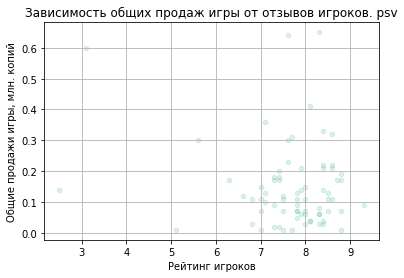

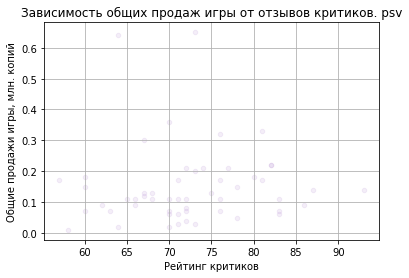

In [66]:
rate('psv')

**PSV**

Записей довольно мало, поэтому результаты корреляции могут быть недостоверны.\
Корреляция с отзывами игроков **невелика: 0.08**, корреляция с отзывами критиков ещё меньше - **0.003**.\
Средняя оценка игроков - **78.1**, а средняя оценка критиков - **72.8**.

Здесь картина иная - оценки игроков заметно больше оценок критиков, корреляция также больше с оценками игроков, чем с оценками критиков.\
Корреляция при этом незначительно мала.

уровень корреляции продаж с отзывами игроков: 0.2151932718527028
Средняя оценка игроков: 71.38181818181819
уровень корреляции продаж с отзывами критиков: 0.314117492869051
Средняя оценка критиков: 68.98039215686275


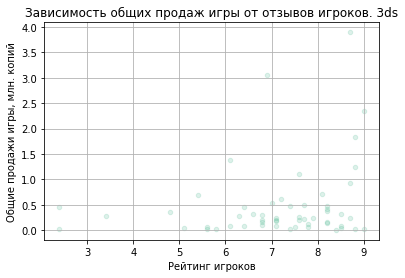

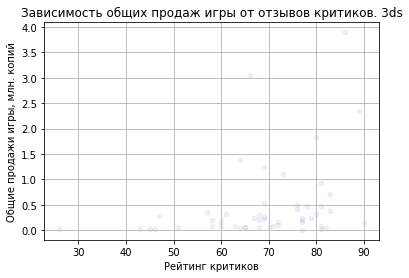

In [67]:
rate('3ds')

**3ds**

Записей довольно мало, поэтому результаты корреляции могут быть недостоверны.\
Корреляция с отзывами игроков **небольшая: 0.20**, корреляция с отзывами критиков немного меньше - **0.18**.\
Средняя оценка игроков - **75**, а средняя оценка критиков - **71.4**.

Здесь картина похожа на PSV: оценки игроков больше оценок критиков, с оценками игроков корреляция незначительно больше,чем с оценками критиков. \
Корреляция мала.

уровень корреляции продаж с отзывами игроков: -0.16676141347662118
Средняя оценка игроков: 60.14285714285714
уровень корреляции продаж с отзывами критиков: 0.44657460493190704
Средняя оценка критиков: 66.55555555555556


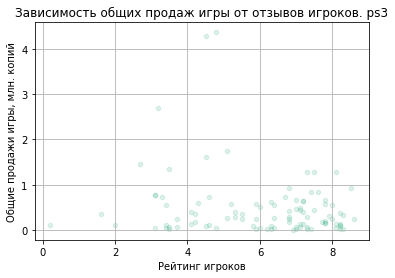

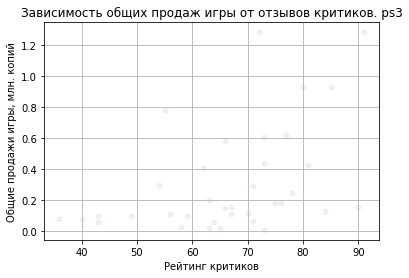

In [68]:
rate('ps3')

**PS3**\
Заметно, что есть только одна оценка игры критиками. Корреляцию проследить не получится.
Корреляция с отзывами игроков отрицательна и **невелика: -0.16**.
Средняя оценка игроков - **55.5**, а средняя оценка критиков - **63**.

**Вывод:** существует корреляция между оценками игры и её продажами.\
При этом оценки от критиков и оценки от игроков влияют на продажи в разной степени.

**PS4**\
отрицательная корреляция продаж с оценками игроков - **-0.06**.\
Cредняя оценка игроками - **68.5**.\
Корреляцию продаж с оценками критиков - **0.39**.\
Средняя оценка критиками - **71.9**.

**Xbox One**\
отрицательная корреляция продаж отзывами игроков **-0.04**\
Средняя оценка игроков - **65.4**\
Корреляция с отзывами критиков - **0.43**.\
Средняя оценка критиков - **73.6**.
В среднем критики ставят более высокие оценки, чем пользователи.

**PSV**\
Отрицательная корреляция с отзывами игроков - **-0.08**\
cредняя оценка игроков - **78.1**\
корреляция с отзывами критиков - **0.003**.\
средняя оценка критиков - **72.8**.

**3ds**\
Корреляция с отзывами игроков - **0.20**\
Средняя оценка игроков - **75**\
корреляция с отзывами критиков - **0.18**.\
Средняя оценка критиков - **71.4**.

**PS3**\
Отрицательная корреляция с отзывами игроков - **-0.16**.\
Средняя оценка игроков - **55.5**\
Есть только одна оценка игры критиками. Корреляция неизвестна.\
Средняя оценка критиков - **63**.

После анализа по 5 платформам видно, что почти во всех случаях корреляция с отзывами игроков отрицательна и незначительно мала.\
Корреляция с отзывами критиков часто влияют на продажи сильнее (больше отзывы - больше продажи), чем отзывы пользователей: исключение - платформа PSV.

## Распределение игр по жанрам

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Строю рейтинг жанров по общим продажам и добавляю расчет средней продажи одной игры в жанре:

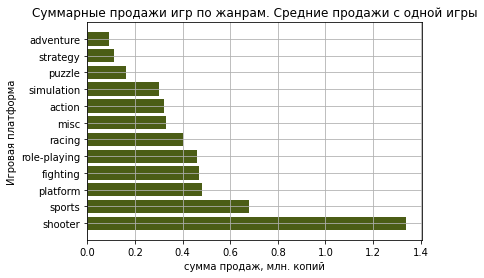

In [69]:
topsales = actual.groupby('genre').agg({'all_sales':['sum','count']}).reset_index()
topsales.columns = [('Жанр'),('Общая сумма продаж, млн. копий'),('Количество игр в жанре')]
topsales['Средние продажи одной игры'] = (topsales['Общая сумма продаж, млн. копий'] / topsales['Количество игр в жанре']).round(2)
topsales = topsales.sort_values('Средние продажи одной игры', ascending=False)

plt.title(f'Суммарные продажи игр по жанрам. Средние продажи с одной игры')
plt.xlabel('сумма продаж, млн. копий')
plt.ylabel('Игровая платформа');
plt.grid()
plt.barh(topsales['Жанр'], topsales['Средние продажи одной игры'], color='#4b5d16');

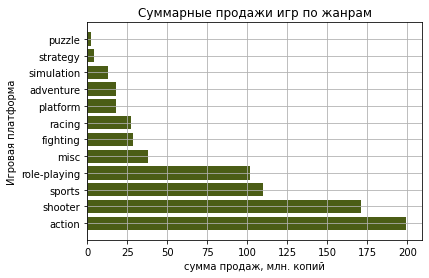

In [70]:
topsales = topsales.sort_values('Общая сумма продаж, млн. копий', ascending=False)
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('сумма продаж, млн. копий')
plt.ylabel('Игровая платформа');
plt.grid()
plt.barh(topsales['Жанр'], topsales['Общая сумма продаж, млн. копий'], color='#4b5d16');

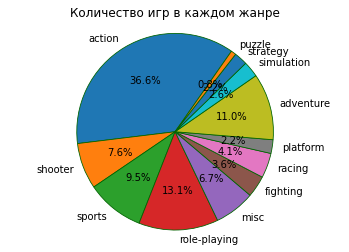

In [71]:
fig, ax = plt.subplots()
ax.set_title('Количество игр в каждом жанре')
ax.pie(
    topsales['Количество игр в жанре'], labels=topsales['Жанр'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55
)
ax.axis("equal");

Самый продаваемый жанр - **shooter**, всего продано 105 млн. копий. Он лидирует и по средним продажам одной игры - 1.31 млн.
На втором месте по продажам - **sports**, 64 млн. копий, средние продажи одной игры - 600 000 копий.\
Последний в топ-3 - жанр **role-playungr**, было продано 55 млн. копий, средние продажи игры - 420 000 копий.

Кроме этого заметно, что жанр **action** принес хорошую прибыль - более 1 млрд. копий суммарно, несмотря на средние продажи игры в 240 000 копий.\
Также заметно, что игр в этом жанре выпущено больше всего - 431 игра, это немного меньше **общего количества** игр во всех остальных жанрах.\

**Вывод:** самые высокие средние продажи одной игры - у жанра **шутер**. За ними идут **спорт** и **ролплей** - игры.\
Среди общего дохода по играм в одном жанре наивысший доход принесли игры в жанре **шутер**, **экшн** и **спорт**.\
При рекламе можно делать ставку на эту эти жанры игр.

# Портрет пользователя для каждого региона

Изучаю три региона:
* NA — Северная Америка
* EU — Европа
* JP - Япония

### Портрет пользователя. Северная Америка

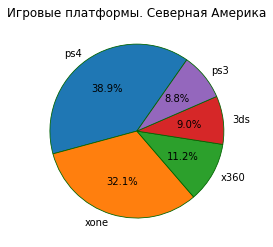

In [72]:
na = actual.groupby('platform').agg({'na_sales':'sum'}).sort_values('na_sales',ascending=False).head(5).reset_index()
na['доля продаж'] = (na['na_sales'] / actual['na_sales'].sum()).round(3)
ax.set_title('Количество игр в каждом жанре')

fig, ax = plt.subplots()
ax.set_title('Игровые платформы. Северная Америка')
ax.pie(
    na['доля продаж'], labels=na['platform'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

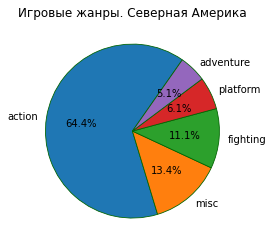

In [73]:
na_genres = actual.groupby('genre').agg({'na_sales':'sum'})
na_genres['доля продаж'] = (na_genres['na_sales'] / actual['na_sales'].sum()).round(3)
na_genres = na_genres.reset_index().head(5).sort_values('доля продаж', ascending=False)

fig, ax = plt.subplots()
ax.set_title('Игровые жанры. Северная Америка')
ax.pie(
    na_genres['доля продаж'], labels=na_genres['genre'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

Две самые популярные платформы - **ps4 и xone**, они составляют **45% и 36%** от продаж игр на все платформы.\
После этого идут 3ds (7.3%), и wii (6.2%).
Самый популярный жанр игр - **action**, он значительно отрывается от остальных по доле продаж (**64.3%**).\
Далее идут жанры misc (10.7%), и fighting (10.4%)

**Как возврастная категория ESRB влияет на продажи?**

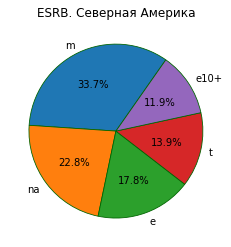

In [74]:
nas = actual.groupby('rating').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False).reset_index()
nas['доля продаж'] = (nas['na_sales']/actual['na_sales'].sum()).round(2)
nas

fig, ax = plt.subplots()
ax.set_title('ESRB. Северная Америка')
ax.pie(
    nas['доля продаж'], labels=nas['rating'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

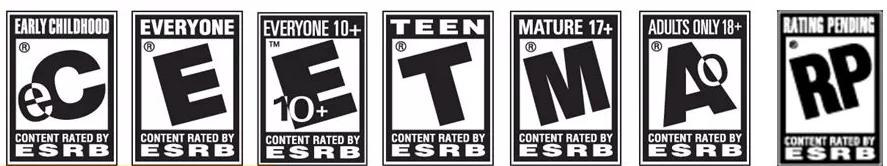

Большую часть продаж составляют игры с рейтингом Mature 17+, 30.7% от всех игр.\
Второе место - na(24.8%), или рейтинг неизвестен, и E(17.8%)

### Портрет пользователя. Европа

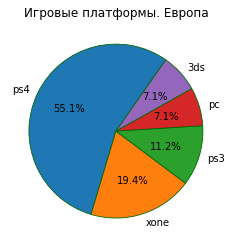

In [75]:
eu = actual.groupby('platform').agg({'eu_sales':'sum'}).sort_values('eu_sales',ascending=False).reset_index().head(5)

eu['доля продаж'] = (eu['eu_sales'] / df['eu_sales'].sum()).round(3)
eu

fig, ax = plt.subplots()
ax.set_title('Игровые платформы. Европа')
ax.pie(
    eu['доля продаж'], labels=eu['platform'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

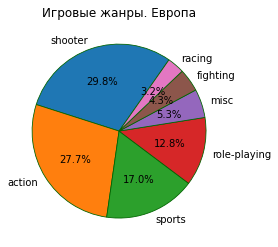

In [76]:
eur = actual.groupby('genre').agg({'na_sales':'sum'}).sort_values('na_sales', ascending=False).head(7).reset_index()
eur['доля продаж'] = (eur['na_sales']/actual['na_sales'].sum()).round(2)

fig, ax = plt.subplots()
ax.set_title('Игровые жанры. Европа')
ax.pie(
    eur['доля продаж'], labels=eur['genre'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

Самыя популярная платформа - **ps4**, она составляет **61.4%** от продаж игр на все платформы.\
После этого идёт xbox One (21.1%), и pc (7%).
Самый популярный жанр игр - **shooter**, он составляет 33.7% от общих продаж.\
Далее идут жанры action (23.2%), sports (17.9%) и role-playing (13.7%).

**Как возврастной рейтинг влияет на продажи?**

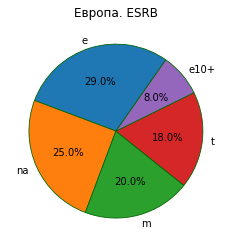

In [77]:
eurp = df.groupby('rating').agg({'eu_sales':'sum'}).sort_values('eu_sales', ascending=False).reset_index().head(5)
eurp['доля продаж'] = (eurp['eu_sales']/df['eu_sales'].sum()).round(2)
eurp

fig, ax = plt.subplots()
ax.set_title('Европа. ESRB')
ax.pie(
    eurp['доля продаж'], labels=eurp['rating'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

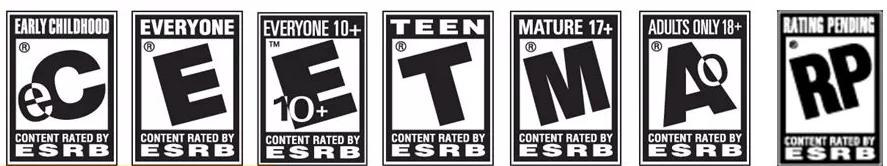

Снова большую часть продаж в 29% составляют игры с рейтингом Е - без возрастного ограничения.\
Второе и третье место - в равных отношениях отсутствие рейтинга na(25%) и Mature 17+(20%).\
Такой высокий процент отсутствия рейтинга можно объяснить тем, что ESRB сущестует только в Канаде, США и Мексике, но не в Европе.

### Портрет пользователя. Япония

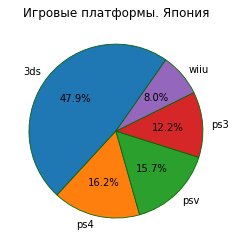

In [78]:
jp = actual.groupby('platform').agg({'jp_sales':'sum'}).sort_values('jp_sales',ascending=False).head(5).reset_index()
jp['доля продаж'] = (jp['jp_sales'] / actual['jp_sales'].sum()).round(3)

fig, ax = plt.subplots()
ax.set_title('Игровые платформы. Япония')
ax.pie(
    jp['доля продаж'], labels=jp['platform'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

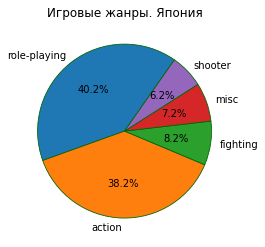

In [79]:
jp_genres = actual.groupby('genre').agg({'jp_sales':'sum'}).sort_values('jp_sales',ascending=False).head(5).reset_index()

jp_genres['доля продаж'] = (jp_genres['jp_sales'] / actual['jp_sales'].sum()).round(3)
jp_genres

fig, ax = plt.subplots()
ax.set_title('Игровые жанры. Япония')
ax.pie(
    jp_genres['доля продаж'], labels=jp_genres['genre'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

Cамая популярная платформа - **Nintendo 3ds**, она составляет **44.4% ** от продаж игр на все платформы.\
После этого идут ps4 (22.7%), psv (15.8%).
Самый популярный жанр игр - **action**, он значительно отрывается от остальных по доле продаж и составляет более 50% от всех жанров.\
Далее идут жанры role-playing (29.3%), и shooter (8.3%).

**Как возврастной рейтинг влияет на продажи?**

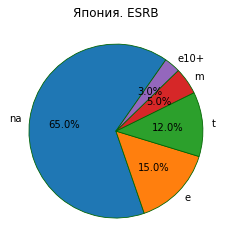

In [80]:
jps = df.groupby('rating').agg({'jp_sales':'sum'}).sort_values('jp_sales', ascending=False).reset_index().head()
jps['доля продаж'] = (jps['jp_sales']/df['jp_sales'].sum()).round(2)
jps

fig, ax = plt.subplots()
ax.set_title('Япония. ESRB')
ax.pie(
    jps['доля продаж'], labels=jps['rating'],
    autopct='%1.1f%%', wedgeprops={'lw':0.8, 'ls':'-','edgecolor':"darkgreen"},
    startangle=55, normalize=True
);

Большую часть продаж 65% составляют игры с рейтингом na - рейтинг неизвестен.\
В других регионах такого количества пропусков не было. Возможно, дело заключается в том, что в Японии постановкой рейтинга занимается другая организация, CERO.\
Второе и третье место - в равных отношениях рейтинг E(для всех возврастов, 15%) и T(Teen, 12%).

In [81]:
# Комментарий ревьюера
temp = df.query('year_of_release >= 2014').copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


na      749
t       271
m       265
e       219
e10+    185
Name: rating, dtype: int64

### Сравнение портретов

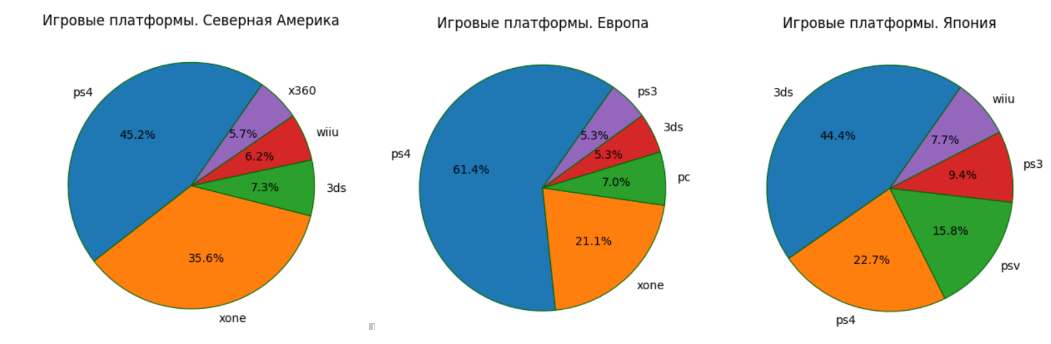

**Популярные платформы:**

В **Северной Америке и Европе** лидирует одна платформа - ps4. в СА она составляет 45% рынка, а в Европе - 61%.
Второе место также занимает одна платформа - xbox one. в **СА** - 36%, в **Европе** - 21%.
На третьем месте в **СА** 3ds 7%, а в **Европе** - игры на PC, также 7%.

В **Японии** картина иная - лидирует nintendo 3ds, 44%, потом идёт ps4 23% и psv 16%.

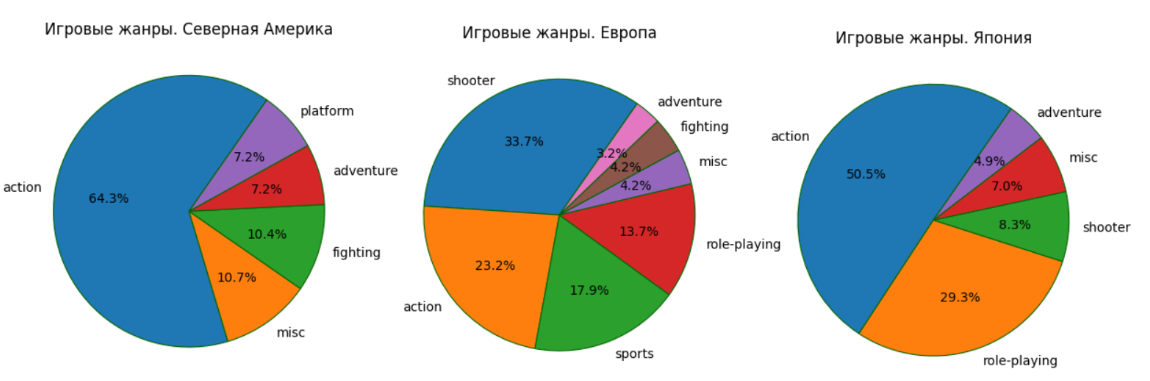

**Популярные жанры:**

В **Северной Америке** абсолютно лидирует жанр action - он составляет 64% от всех продаж. На втором и третьем месте - fighting и misc, около 10% каждый.\
В **Европе** лидирует жанр shooter - 34%, потом идёт action 23% и sports 18%.\
В **Японии** самый популярный жанр - action, более 50%. После этого идёт role-playing 29% и shooter - 8.3%.

**Возрастной рейтинг ESRB:**

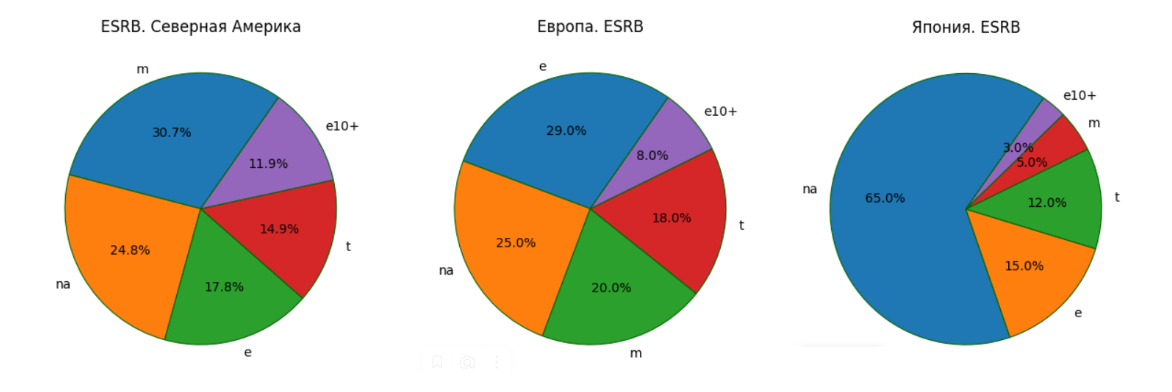

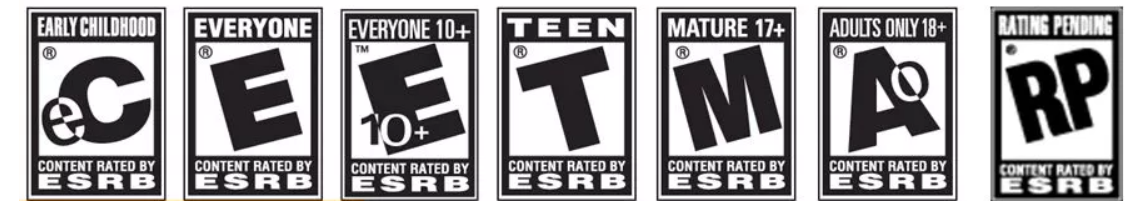

**Общий вывод:**
При размещении рекламы стоит учитывать, что для разных регионов заметны разные портреты пользователя.

В **Северной Америке** лучше всего продаются игры на ps4 и xbox one\
. Из жанров лучше всего продаются экшен, файтинг и музыкальные игры.\
При этом самый продавамый возрастной рейтинг - M 17+, а также E - Everyone.

В **Европе** лучше всего продаются игры на платформы ps4(подавляющее большинство) и xbox One.\
Самые продаваемые жанры - шутер, экшн и спорт.\
Лучше всего продаются игры с рейтингом E - Everyone, а также M 17+.

В **Японии** самая продаваемая платформа - Nintendo 3ds(подавляющее большинство), а также ps4 и psv.\
Лучше всего продаются жанры экшен, ролплей и шутер.\
При этом у большинства игр нет рейтинга ESRB, среди игр, имеющих рейтинг, лучше всего продаются рейтинги E - Everyone и  T - Teen.

# Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковы?

Нулевая гипотеза: средние пользовательские рейтинги Xbox One равны средним пользовательским рейтингам PC.\
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Задаю две генеральные совокупности, удаляю пропуски и смотрю на их финальный размер:

In [82]:
xone = actual[actual['platform'] == 'xone']['user_score'].dropna()
pc = actual[actual['platform'] == 'pc']['user_score'].dropna()
print(f'размер совокупности оценок геймеров для xone:{xone.count()}')
print(f'размер совокупности оценок геймеров для PC:{pc.count()}')

размер совокупности оценок геймеров для xone:165
размер совокупности оценок геймеров для PC:122


Проверить равенство двух средних можно, используя гипотезу о равенстве средних двух генеральных совокупностей и T-test.
Вот почему:

* обе генеральные совокупности не зависят друг от друга: это отдельные оценки по отдельным платформам
* размер выборок достаточно велик: обе выборки имеют размер более чем в 30 значений

При этом неизвестно, равны ли дисперсии обоих совокупностей, поэтому я установлю параметр равенства дисперсий на False.\
Уровень статистической значимости устанавливаю 5%.

In [83]:
from scipy import stats as st

alpha = .05

result = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - средние пользовательские рейтинги не равны.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print(f'Средняя оценка игроками игр на Xbox One: {xone.mean().round(2)}')
print(f'Средняя оценка игроками игр на PC: {pc.mean().round(2)}')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу
Средняя оценка игроками игр на Xbox One: 6.59
Средняя оценка игроками игр на PC: 6.3


Гипотезу отвергнуть не получилось: есть основания считать, что средние пользовательские рейтинги у PC и Xbox One в среднем равны.

### Средние пользовательские рейтинги жанров Action и Sports разные?

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.\
Альтернативная гипотеза: средние пользовательские рейтинги различаются.\
Задаю две генеральные совокупности и удаляю пропуски:

In [84]:
action = actual[actual['genre'] == 'action']['user_score'].dropna()
sports = actual[actual['genre'] == 'sports']['user_score'].dropna()
print(f'размер совокупности оценок геймеров жанра action:{action.count()}')
print(f'размер совокупности оценок геймеров жанра sports:{sports.count()}')

размер совокупности оценок геймеров жанра action:297
размер совокупности оценок геймеров жанра sports:127


Также использую T-test и гипотезу о равенстве средних двух генеральных совокупностей, условия данных под неё подходят, как в предыдущей гипотезе.\
Уровень статистической значимости оставляю на уровне в 5%:


In [85]:
alpha = .05

result2 = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', result2.pvalue)

if result2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - средние пользовательские рейтинги не равны.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

print(f'Средняя оценка игроками игр на Xbox One: {action.mean().round(2)}')
print(f'Средняя оценка игроками игр на PC: {sports.mean().round(2)}')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу - средние пользовательские рейтинги не равны.
Средняя оценка игроками игр на Xbox One: 6.76
Средняя оценка игроками игр на PC: 5.23


Нулевую гипотезу отвергнуть не получилось - есть основания думать, что средние пользовательские оценки жанра action и среднии оценки жанра sports - разные.

**Выводы:**

1. Есть основания считать, что средние пользовательские рейтинги у **PC** и **Xbox One** **примерно одинаковы**.
2. Вероятно, средние пользовательские оценки жанра **action** **отличаются** от средних оценок жанра **sports**.

# Общие выводы. Ответы на поставленные вопросы

### 1. Сколько игр выпускалось в разные годы?

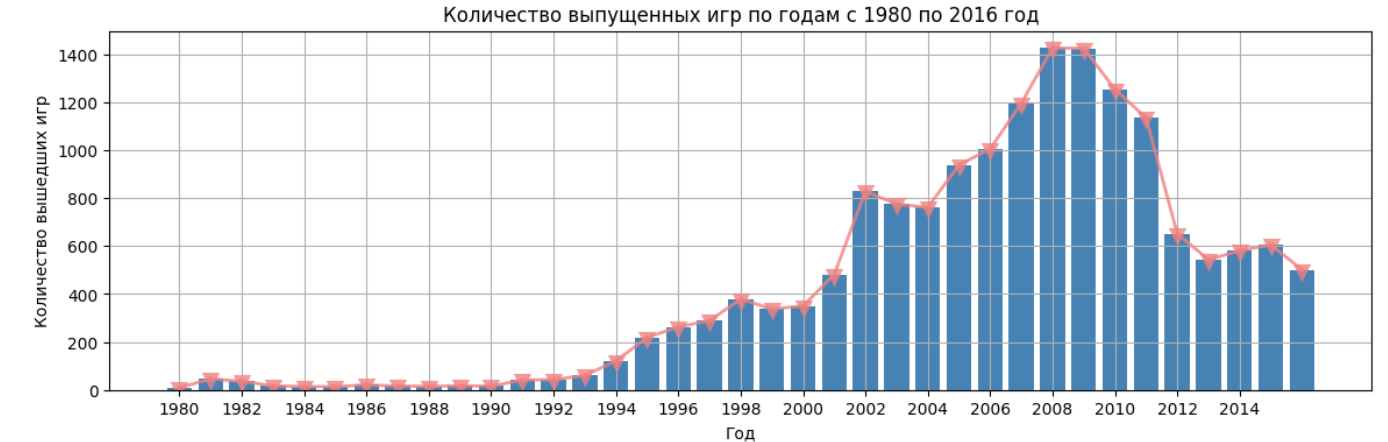

**Вывод:** массовое появление новых игр впервые началось в **2002 году** и превысило 800 выпущенных игр.\
Ранее, до 1993 года, было не более 50 релизов в год, а до 2001 - не более 400 релизов.\
С **2005 по 2008 год** происходит интенсивный **рост** количества выпущенных игр в геометрической прогресии (все больше с каждым годом), **превышая** 1400 выпусков в год.\
Далее **с 2009 по 2011 год** количество выходов новых игр **снижается** примерно на 100 игр каждый год, а **в 2012 году** - резкое **падение** количества новых релизов примерно на 500, до 653 выпущенных игр.\
После **2012 года** количество новых релизов почти не менялось, незначительно уменьшаясь в **2013 году** и незначительно увеличиваясь к **2014-2015 г.**

2016 год ещё не закончился, поэтому сложно судить про эту метрику.

### 2. Как менялись продажи в зависимости от платформы?

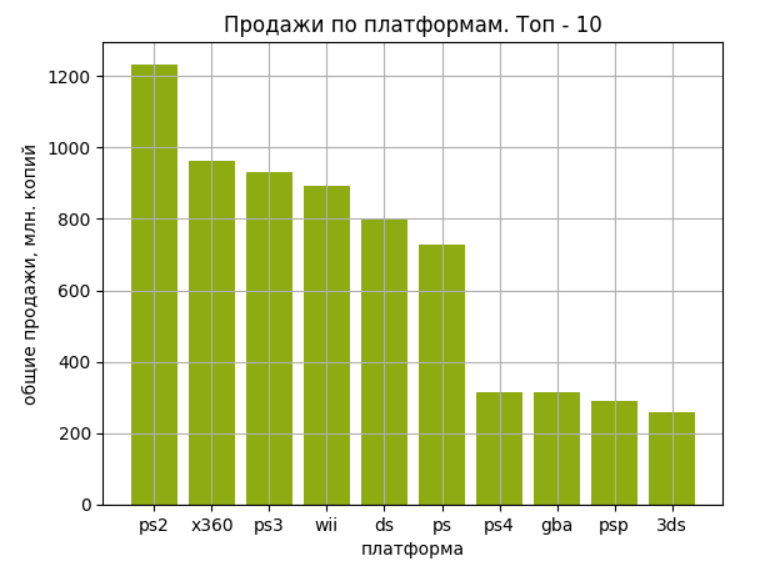

Заметно больше, чем остальные платформы, принесли продажи игр на ps2, на последнем месте рейтинга - 3ds.

Первые игры на других платформах помимо PC появились только в 1994 году, это был playStation. Поэтому используется статистика не с 1980, а с 1994 года.\
График, начиная **с 1994 года**:

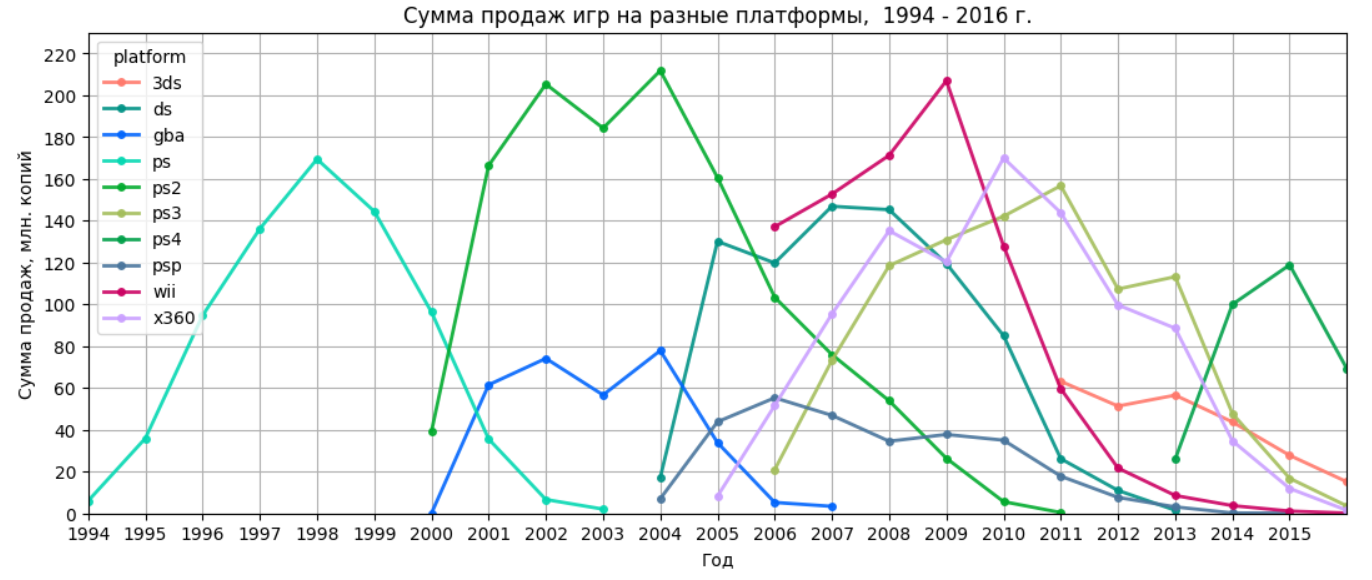

Заметно, как новые платформы появлялись, достигали максимальной популярности, а после этого с течением лет ее теряли ввиду выхода новых платформ и устаревания старых, ведь системные требования игр все это время росли.\
Также заметно, что после 2010 года общие продажи по всем платформам пошли на спад, единственное исключение - появившаяся в 2013 году **PS4**.
 

#### За какой характерный срок появляются новые и исчезают старые платформы?

Стабильной остаётся только одна платформа - компьютерные игры. При этом продажи превышают 20 млн. копий год только в 2010 году, после чего падают ниже после 2012 года. 20 млн - это примерно 1/10 от максимальных продаж игр на ps2.

Игровые платформы в среднем имеют характерный срок рассвета своей популярности и падения продаж после его окончания.

Этот срок составляет **3-4 года**.\
При этом платформа исчезает с рынка в среднем через **7 лет**, то есть продажи падают до минимальных и уже существенно ниже тех, что были на старте.

### 3. Анализ данных за актуальный период 2014-2016 г. Прогноз на 2017 год. Лидеры по продажам и потенциально прибыльные платформы

Для того, чтобы представить тенденции и прогноз на 2017 год, нужен **актуальный период** - беру продажи **с 2014 по 2016 г.**

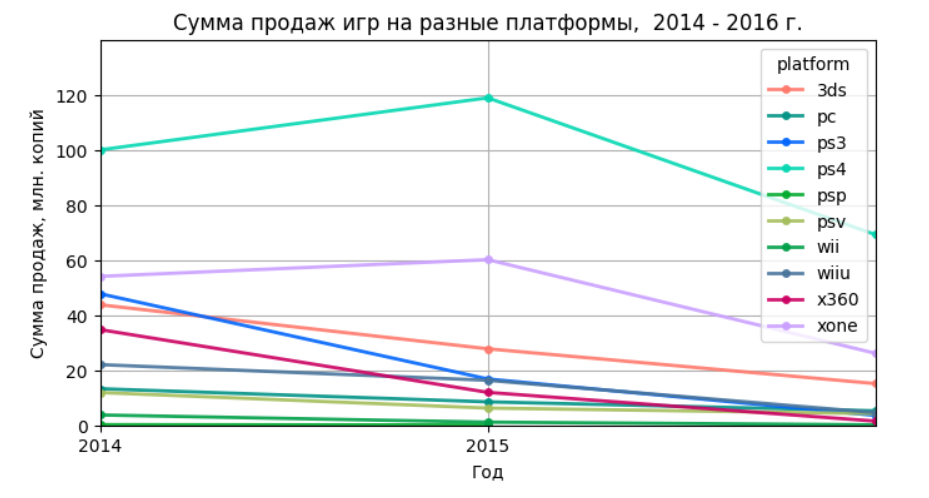

Из графика видно, что продажи по всем платформам падали в течение 2015-2016 года.\
При этом с 2014 по 2015 год продажи росли **только у платформ PS4 и Xbox One**.

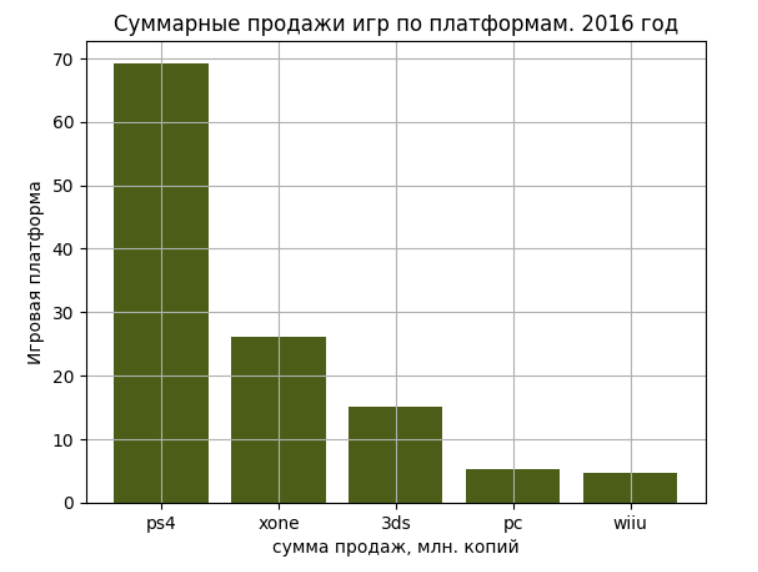

При этом заметно, что продажи игр на 3ds и в 2015 были небольшими, особо не изменившись в то время как у ps4 и xone они были больше текущих в 2-3 раза, и занимали одни из самых высокий позиций топа.\
При этом ps4 согласно общему графику, скорее всего, будет набирать обороты далее, ведь консоль вышла недавно, и средние сроки актуальности для неё ещё не прошли.

**Вывод:** Потенциально прибыльные платформы на 2017 год - **PlayStation 4** и **Xbox One**.

#### Как отзывы пользователей и критиков влияют на продажи внутри одной платформы

Приведен анализ влияние отзывов на продажи игр на 5-ти самых популярных платформах.

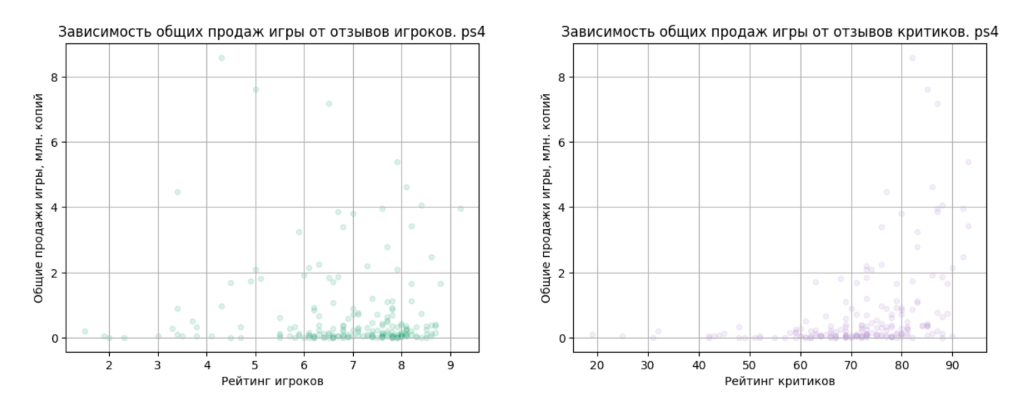

**PS4**

Заметна незначительная отрицательная корреляция продаж с **оценками игроков** - **-0.06**.\
Это означает, что отзывы игроков практически не влияют на продажи.\
При этом средняя оценка пользователями - **68.5**.

Также видно корреляцию продаж с **оценками критиков** - **0.39**.\
Это небольшое значение, но наглядно видно, что продажи игры коррелируют с отзывами критиков в несколько раз больше, чем с отзывами игроков.\
При этом средняя оценка критиками - **71.9**.

В среднем критики ставят более высокие оценки, чем пользователи.

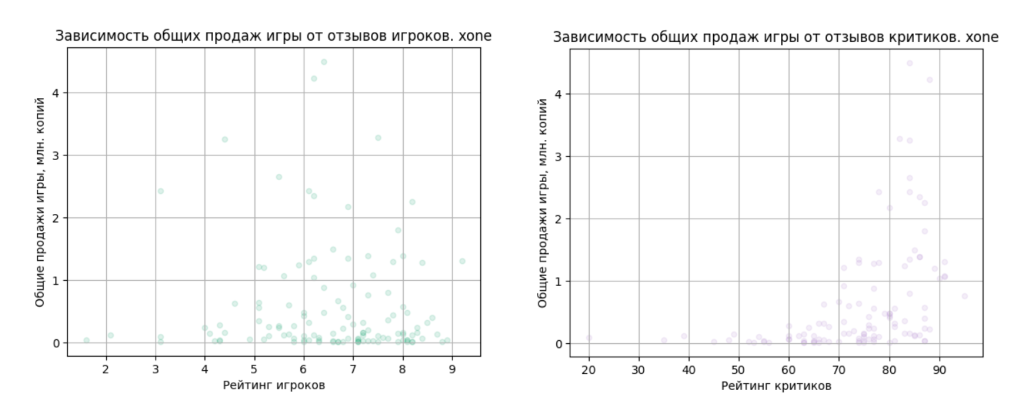

**Xbox One**\
Корреляция с отзывами игроков **невелика: - 0.04**, корреляция с отзывами критиков - **0.43**.\
Средняя оценка игроков - **65.4**, а средняя оценка критиков - **73.6**.

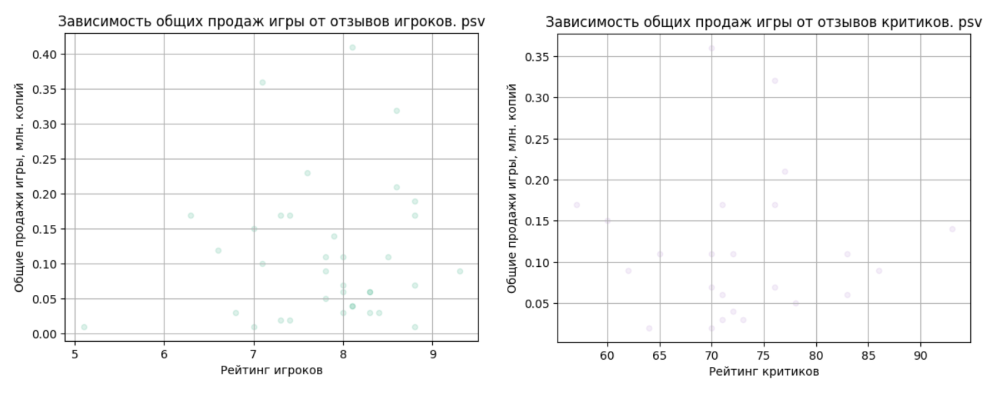

**PSV**

Записей довольно мало, поэтому результаты корреляции могут быть недостоверны.\
Корреляция с отзывами игроков **невелика: 0.08**, корреляция с отзывами критиков ещё меньше - **0.003**.\
Средняя оценка игроков - **78.1**, а средняя оценка критиков - **72.8**.

Здесь картина иная - оценки игроков заметно больше оценок критиков, корреляция также больше с оценками игроков, чем с оценками критиков.\
Корреляция при этом незначительно мала.

По оставшимся платформам 3ds и ps3 записей слишком мало, что не дает составить объективной картины.

**Вывод:** существует корреляция между оценками игры и её продажами.\
При этом оценки от критиков и оценки от игроков влияют на продажи в разной степени.

**PS4**\
отрицательная корреляция продаж с оценками игроков - **-0.06**.\
Cредняя оценка игроками - **68.5**.\
Корреляцию продаж с оценками критиков - **0.39**.\
Средняя оценка критиками - **71.9**.

**Xbox One**\
отрицательная корреляция продаж отзывами игроков **-0.04**\
Средняя оценка игроков - **65.4**\
Корреляция с отзывами критиков - **0.43**.\
Средняя оценка критиков - **73.6**.
В среднем критики ставят более высокие оценки, чем пользователи.

**PSV**\
Отрицательная корреляция с отзывами игроков - **-0.08**\
cредняя оценка игроков - **78.1**\
корреляция с отзывами критиков - **0.003**.\
средняя оценка критиков - **72.8**.

Это означает, что при размещении рекламы нужно учитывать:
* стоит продвигать игры, опираясь на рейтинг критиков, а не на пользовательский рейтинг. Корреляция положительная: выше рейтинг критиков - выше продажи.
* В среднем пользователи ставят менее высокие оценки, чем критики.

### 4. Диаграмма размаха глобальных продаж игр в разбивке по платформам

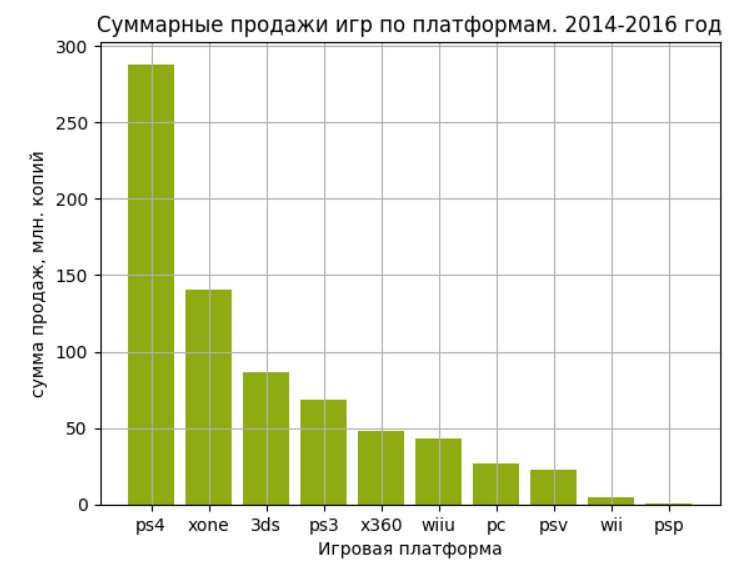

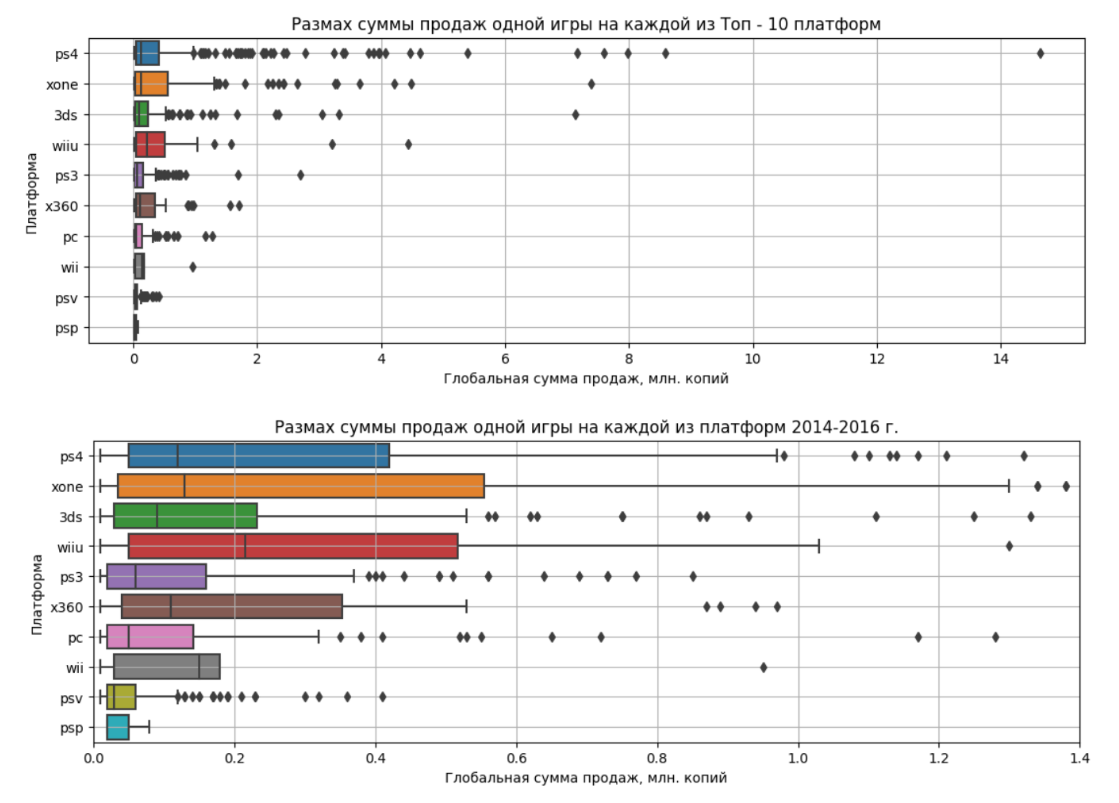

**Вывод:** самый большой размах - у игр для Xbox One, самый маленький - у игр для psp.
Также значительно велик размах у продаж игр для Wii U.

При этом заметно, что медианное значение суммы продаж одной игры на любой платформе не превышает 0.22, или 220 000 копий.\
Лидер по медианному значению - Wii U (215 000 продаж), самое низкое медианное значение - у psp, 20 000 проданных копий.
Самое большое среднее значение продаж одной игры у платформы **ps4** = 625 000 продаж.\
Рядом находится **Xbox One** со средним в 517 000 продаж и **Wii U** с 499 000 продаж одной игры в среднем.

* При проведении рекламной компании стоит учитывать, что **лучше всего продаются игры на PS4, Xbox One и Wii U.**

### 5. Распределение игр по жанрам. Самые прибыльные жанры

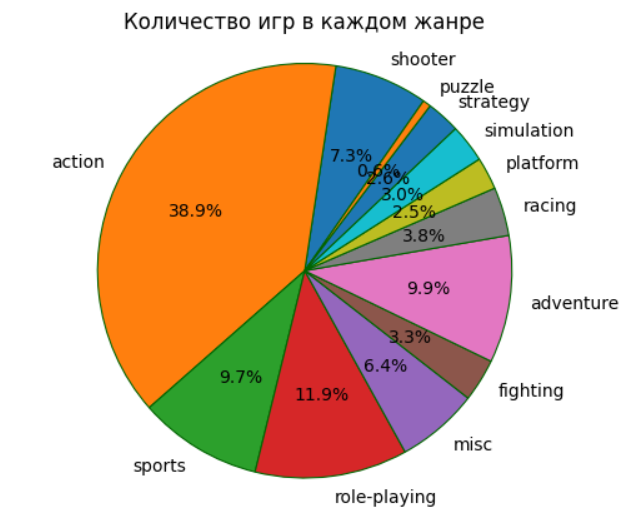

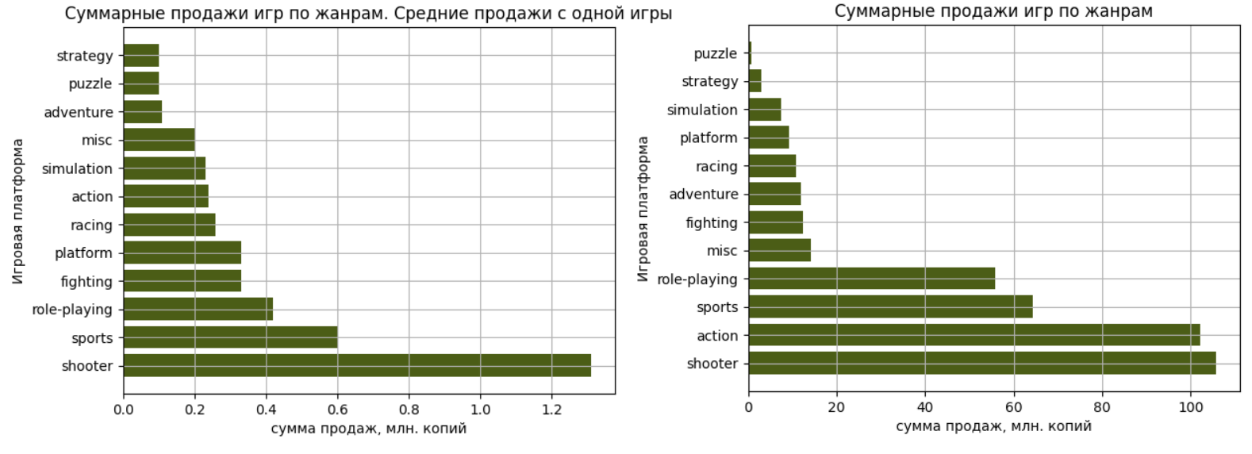

Самый продаваемый жанр - **shooter**, всего продано 105 млн. копий. Он лидирует и по средним продажам одной игры - 1.31 млн.
На втором месте по продажам - **sports**, 64 млн. копий, средние продажи одной игры - 600 000 копий.\
Последний в топ-3 - жанр **role-playungr**, было продано 55 млн. копий, средние продажи игры - 420 000 копий.

Кроме этого заметно, что жанр **action** принес хорошую прибыль - более 1 млрд. копий суммарно, несмотря на средние продажи игры в 240 000 копий.\
Также заметно, что игр в этом жанре выпущено больше всего - 431 игра, это немного меньше **общего количества** игр во всех остальных жанрах.\

**Вывод:** самые высокие средние продажи одной игры - у жанра **шутер**. За ними идут **спорт** и **ролплей** - игры.\
Среди общего дохода по играм в одном жанре наивысший доход принесли игры в жанре **шутер**, **экшн** и **спорт**.\
* При рекламе можно делать ставку на эту эти жанры игр.

### 6. Портрет пользователя для каждого региона. Северная Америка, Европа и Япония

Графики построены для самых популярных платформ. Составляющие незначительный процент от всех платформ не отражены на графике.

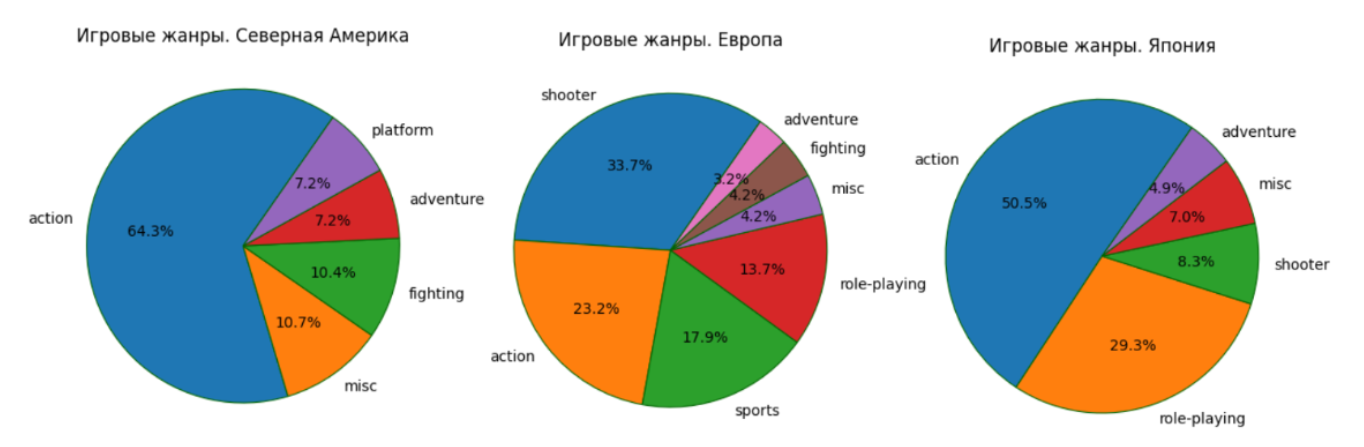

**Популярные платформы:**

В **Северной Америке и Европе** лидирует одна платформа - ps4. в СА она составляет 45% рынка, а в Европе - 61%.
Второе место также занимает одна платформа - xbox one. в **СА** - 36%, в **Европе** - 21%.
На третьем месте в **СА** 3ds 7%, а в **Европе** - игры на PC, также 7%.

В **Японии** картина иная - лидирует nintendo 3ds, 44%, потом идёт ps4 23% и psv 16%.

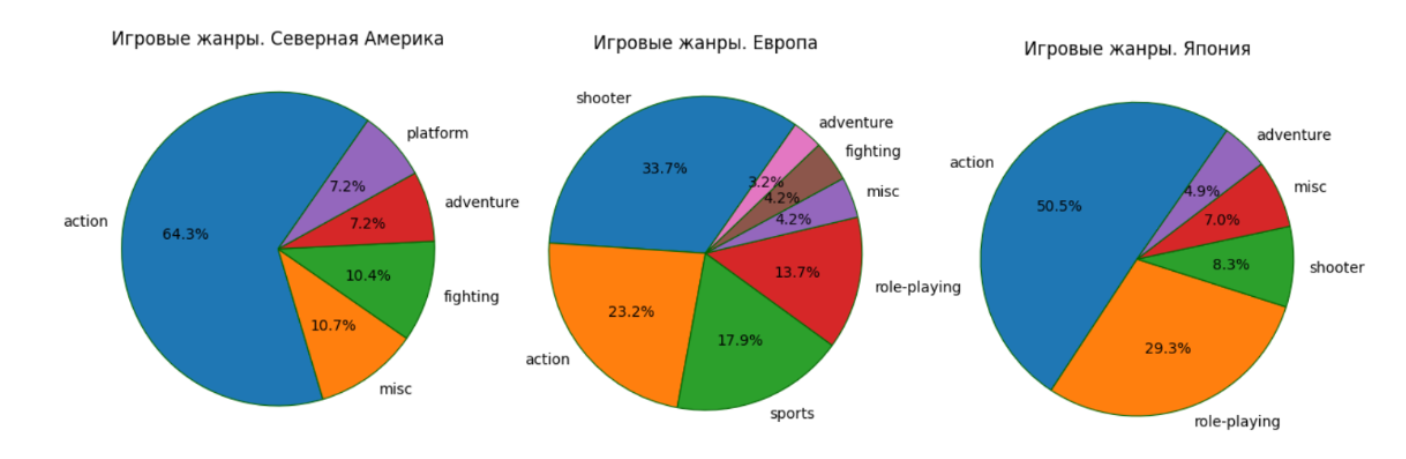

**Популярные жанры:**

В **Северной Америке** абсолютно лидирует жанр action - он составляет 64% от всех продаж. На втором и третьем месте - fighting и misc, около 10% каждый.\
В **Европе** лидирует жанр shooter - 34%, потом идёт action 23% и sports 18%.\
В **Японии** самый популярный жанр - action, более 50%. После этого идёт role-playing 29% и shooter - 8.3%.

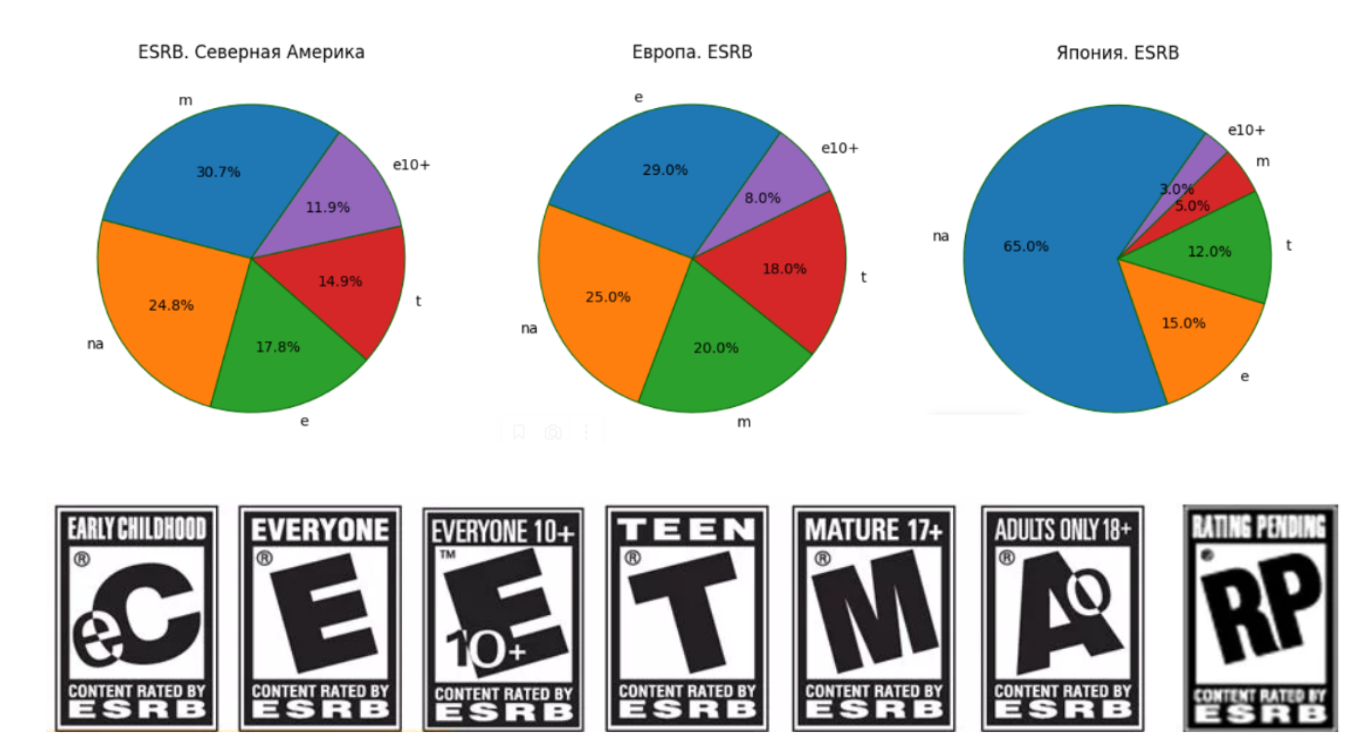

портрет игрока в **Северной Америке** и **Европе** в целом схож, при этом в Северной америке предпочитают **x360**, а в Европе - **ps3**.\
В обоих странах также много играют в ps2 и Wii.\
Жанры тоже схожи, при этом в Северной Америке любят **платформеры**, а в Европе - **гонки**.\
В обоих регионах лидирует жанр **action**, составляя **1/5** от всех продаж.\
Кроме этого, обе страны выбирают жанры sports, shooter и misc.

Портрет игрока в **Японии** отличается - на рынке лидирует **nintendo DS**, составляя **более 1/5** от всех продаж.\
Кроме этого в Японии не выбирают **x360** и **ps3** - их места в рейтинге занимают ps и ps2.\
Это влияет и на жанры: лидирует жанр **role-playing**, составляющий **более 1/4** от всех продаж.\
После идут жанры action и sports, а далее - platform и misc.

Влияния возврастного рейтинга ESRB на продажи в каждом из регионов не прослеживается - во всех трёх случаях в топе по долям от общих продаж три рейтинга:\
Игры с рейтингом Е - без возрастного ограничения.\
Второе и третье место - в равных отношениях рейтинг Teen 13+ и Mature 17+.

**Общий вывод:**
При размещении рекламы стоит учитывать, что для разных регионов заметны разные портреты пользователя.

В **Северной Америке** лучше всего продаются игры на ps4 и xbox one.\
Из жанров лучше всего продаются экшен, файтинг и музыкальные игры.\
При этом самый продавамый возрастной рейтинг - M 17+, а также E - Everyone.

В **Европе** лучше всего продаются игры на платформы ps4(подавляющее большинство) и xbox One.\
Самые продаваемые жанры - шутер, экшн и спорт.\
Лучше всего продаются игры с рейтингом E - Everyone, а также M 17+.

В **Японии** самая продаваемая платформа - Nintendo 3ds(подавляющее большинство), а также ps4 и psv.\
Лучше всего продаются жанры экшен, ролплей и шутер.\
При этом у большинства игр нет рейтинга ESRB, среди игр, имеющих рейтинг, лучше всего продаются рейтинги E - Everyone и  T - Teen.

### Проверка гипотез

Гипотезы были проверены проведением T-test'а, использовалась теорема о равенстве средних двух генеральных совокупностей.\
Это наиболее подходящий способ анализа, потому что:

* обе генеральные совокупности не зависят друг от друга: это отдельные оценки по отдельным платформам
* размер выборок достаточно велик: обе выборки имеют размер более чем в 100 значений

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковы?

 Есть основания считать, что средние пользовательские рейтинги у **PC** и **Xbox One** **примерно одинаковы**.

#### Средние пользовательские рейтинги жанров Action и Sports разные?

Вероятно, средние пользовательские оценки жанра **action** **отличаются** от средних оценок жанра **sports**.

### Заключение

Я начал с анализа изначального датасета и предобработки данных.
В исходном датасете встречаются пропуски.

2 пропуска в колонке "название игры", 2 пропуска в колонке "жанр", около 200 пропусков в колонке "дата выхода").
Очень большое количество пропусков встречается в столбцах рейтинга: "рейтинг критиков", "рейтинг игроков" и "возрастной рейтинг ESRB". Количество строк с пропусками одновременно в этих трёх столбцах достигает 40% от всех изначальных данных.

У пропусков в колонке ESRB есть 2 причины:
1. Рейтинг начал действовать только в 1994 году.
2. Рейтинг действует только в США и Канаде.
Сейчас пропуски заменены на na - нет рейтинга.

Пропуски в колонках name, year_of_release и genre можно объяснить работой системы - то есть технические ошибки при выгрузке. На это указывает также то, что пропусков очень мало.\
Пропуски в колонках "рейтинг игроков" и "рейтинг критиков" можно объяснить недостаточной выгрузкой информации по большой части игр.

Также в исходном датасете не все типы данных соответствуют реальным - "год выхода" является целым числом, а не дробным, но тип указан float(дробный).\
Кроме этого, колонка "рейтинг игроков" содержит числа, но тип колонки - object, а не int.\
Эти типы данных приведены к нужным, причина некорректных типов - технические настройки при выгрузке датасета.

Я удалил строки с пропусками в колонках "название игры", строки с пропусками "жанр" и строки с пропусками "дата выхода".\
Потери данных оказались незначительными.\
Пропуски в колонке ESRB я заменил заглушкой - na, а также заменил одну запись с рейтингом K-A (устаревшим) на современный вариант - Е.

После этого я проверил данные на явные дубликаты и удалил неявные - это строки, где повторяются одновременно название игры, год выхода и платформа.

Далее я посчитал суммарную выручку каждой игры и вывел её в новую колонку.

Приступив к исследовательскому анализу, я построил график количества игр, выпускаемых в разные годы.
После этого я рассмотрел суммарные продажи по разным платформам за всё время, с 1980 по 2016 год, и вывел ТОП-10.
Также я построил график с 1992 по 2016, чтобы увидеть, как менялить продажи каждой платформы по годам.
Выяснилось:
* за все время сущестования индустрии больше всего принесли продажи игр на **ps2, x360 и ps3**
* игровые платформы в среднем имеют характерный срок рассвета своей популярности и падения продаж после его окончания.\
этот срок составляет 3-4 года.\
При этом платформа исчезает с рынка в среднем **через 7 лет** после появления.

В качестве актуального периода я выбрал последние **2 года - с 2014 по 2016 год**, он хорошо отразит тенденцию на 2017 год.
Изучив данные за эти 2 года и посмотрев на продажи самых популярных платформ, выявил:
* потенциально прибыльные платформы на 2017 год - **PlayStation 4** и **Xbox One**.

После этого я проверил, влияют ли на продажи игры отзывы критиков и пользователей. Анализ показал:
* существует корреляция между оценками игры и её продажами.
* оценки критиков влияют на продажи игры **сильнее**, чем оценки пользователей.
* пользователи ставят в среднем менее высокие оценки, чем критики.

Далее я построил диаграмму размаха глобальных продаж игр по платформам.\
самый большой размах - у игр для Xbox One, самый маленький - у игр для psp.
Также значительно велик размах у продаж игр для Wii U.
Я сравнил средние продажи одной игры у всех платформ. Выявилось:
* лучше всего продаются игры на **PS4, Xbox One и Wii U.**

На следующем этапе я построил распределение игр по жанрам. Установил:
самые высокие средние продажи одной игры - у жанра **шутер**. За ними идут **спорт** и **ролплей** - игры.\
Среди общего дохода по играм в одном жанре наивысший доход принесли игры в жанре **шутер**, **экшн** и **спорт**.\
Таким образом:
* по доходам от одной игры лидируют жанры **шутер, спорт и ролплей**.
* наиболее стабильные жанры с наивысшим суммарным доходом - **шутер, экшн и спорт**.

После этого я составил портреты пользователей для разных регионов: Северная Америка, Европа и Япония.\
Анализ показал:
В **Северной Америке**:
* лучше всего продаются игры на **ps4 и xbox one**.
* из жанров лучше всего продаются **экшен, файтинг и музыкальные игры**.
* самый продавамый возрастной рейтинг - **M 17+**, а также **E** - Everyone.

В **Европе**:
* лучше всего продаются игры на платформы **ps4 и xbox One**.
* самые продаваемые жанры - **шутер, экшн и спорт**.
* лучше всего продаются игры с рейтингом **E** - Everyone, а также **M 17+**.

В **Японии**:
* самая продаваемая платформа - **Nintendo 3ds**, а также **ps4 и psv**.
* лучше всего продаются жанры **экшен, ролплей и шутер**.
* у большинства игр нет рейтинга ESRB, среди игр, имеющих рейтинг, лучше всего продаются рейтинги **E - Everyone** и  **T - Teen**.

Я завершил исследование проверкой гипотез путём проведения T-test'а для 2х независимых генеральных совокупностей.\
**Результаты проверки гипотез:**
* есть основания считать, что средние пользовательские рейтинги у **PC** и **Xbox One** **примерно одинаковы**.
* вероятно, средние пользовательские оценки жанра **action** **отличаются** от средних оценок жанра **sports**.